# **Business Case: Walmart - Confidence Interval and CLT**

**About Walmart**

Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.

**Business Problem**

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

---

## Importing libraries and downloading dataset

In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom, norm, poisson, expon
import statsmodels.stats as st
import warnings
warnings.filterwarnings('ignore')

# Downloading Wallmart Dataset
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094')

## Basic Metrics

In [ ]:
# First 5 rows
df.head()

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  
0                          2               0                 3      8370  
1                          2               0                 1     15200  
2                          2               0                12      1422  
3                          2               0                12      1057  
4                         4+               0                 8      7969

In [ ]:
# Shape
df.shape

(550068, 10)

- There are 5,50,068 rows and 10 columns in the data.

In [ ]:
# Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  object
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 42.0+ MB


- There are no null values.

- The columns user_id, occupation(masked), marital_status, product_category and purchase have integer datatype.

- Rest of the columns(product_id, gender, age, city_category, stay_in_current_city_years) are object datatype.

In [ ]:
# unique count in each column
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

In [ ]:
# Check duplicates
df.duplicated().sum()

0

- There are no duplicates in the dataset

## Descriptive Statistical Analysis

In [ ]:
# statistical analysis of numerical columns
df.describe()

User_ID     Occupation  Marital_Status  Product_Category  \
count  5.500680e+05  550068.000000   550068.000000     550068.000000   
mean   1.003029e+06       8.076707        0.409653          5.404270   
std    1.727592e+03       6.522660        0.491770          3.936211   
min    1.000001e+06       0.000000        0.000000          1.000000   
25%    1.001516e+06       2.000000        0.000000          1.000000   
50%    1.003077e+06       7.000000        0.000000          5.000000   
75%    1.004478e+06      14.000000        1.000000          8.000000   
max    1.006040e+06      20.000000        1.000000         20.000000   

            Purchase  
count  550068.000000  
mean     9263.968713  
std      5023.065394  
min        12.000000  
25%      5823.000000  
50%      8047.000000  
75%     12054.000000  
max     23961.000000

- Range of purchase amount is 12 dollars to 23961 dollars.

- Mean purchase amount is 9264 dollars.

- Median purchase amount is 8047 dollars.

- Standard deviation of purchase amount is 5023 dollars.

- Inter quartile range of purchase amount is 5823 to 12054 dollars.

In [ ]:
# statistical analysis of object columns
df.describe(include='object')

Product_ID  Gender     Age City_Category Stay_In_Current_City_Years
count      550068  550068  550068        550068                     550068
unique       3631       2       7             3                          5
top     P00265242       M   26-35             B                          1
freq         1880  414259  219587        231173                     193821

- ‘P00265242’ is the most sold product.

- People in age group 26–35 make more purchases than any other age group.

- People of city category B make more purchases than other city city categories.

- People who have stayed in their city for only one year make more purchases than others.


## Replacing Column values

In [7]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [8]:
df['Marital_Status'].unique()

array([0, 1])

- The values for 'Gender' column are given in shortcut, F for Females and M for Males.

- The values for 'Marital Status' column are masked, 0 for Unmarried and 1 for Married.

Lets replace these values for better understanding.

In [2]:
df['Gender'] = df['Gender'].apply(lambda x :'Male' if (x=='M') else 'Female')
df['Marital_Status'] = df['Marital_Status'].apply(lambda x :'Unmarried' if (x==0) else 'Married')
df.head()

User_ID Product_ID  Gender   Age  Occupation City_Category  \
0  1000001  P00069042  Female  0-17          10             A   
1  1000001  P00248942  Female  0-17          10             A   
2  1000001  P00087842  Female  0-17          10             A   
3  1000001  P00085442  Female  0-17          10             A   
4  1000002  P00285442    Male   55+          16             C   

  Stay_In_Current_City_Years Marital_Status  Product_Category  Purchase  
0                          2      Unmarried                 3      8370  
1                          2      Unmarried                 1     15200  
2                          2      Unmarried                12      1422  
3                          2      Unmarried                12      1057  
4                         4+      Unmarried                 8      7969

## Purchase Analysis

### No.of Purchases by Gender, Marital Status and City category

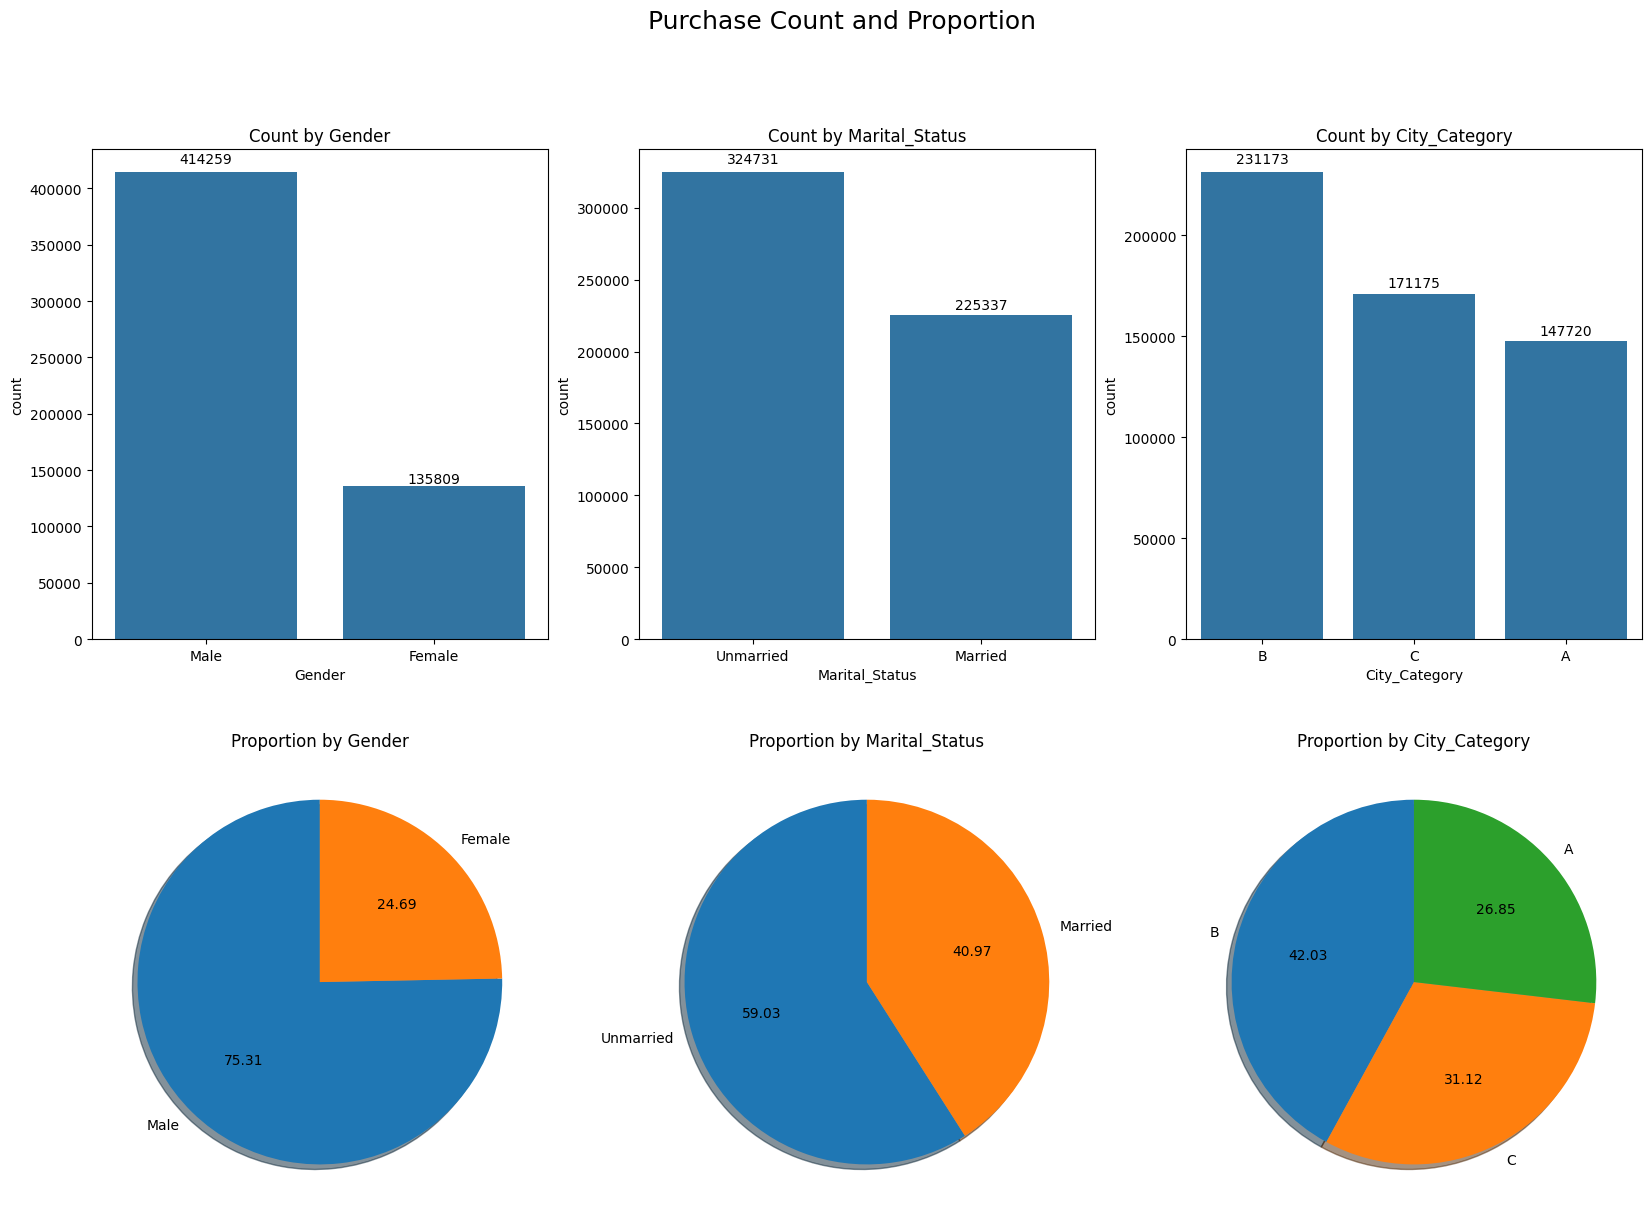

In [ ]:
plt.figure(figsize=(20,14)).suptitle('Purchase Count and Proportion',fontsize=18)

vars = ['Gender', 'Marital_Status', 'City_Category']

for i in range(len(vars)):
  plt.subplot(2,3,i+1)
  plt.title('Count by '+vars[i], fontsize=12)
  g = sns.countplot(df, x=vars[i], order=df[vars[i]].value_counts().index)
  for p in g.patches:
    g.text(x = p.get_x()+p.get_width()/2, y = p.get_height()*1.02, ha = 'center', s = round(p.get_height()))

  plt.subplot(2,3,i+4)
  plt.title('Proportion by '+vars[i], fontsize=12)
  plt.pie(x = df[vars[i]].value_counts(),
        labels = df[vars[i]].value_counts().index,
        startangle = 90,
        shadow = True,
        autopct = '%.2f')

plt.show()

- **Gender** :

  - Male Customers made more purchases than Females.

  - Around 75% of the purchases were made by Males and rest by Females.

  - 414,259 users in the dataset are males and 135,809 are females.

- **Marital Status** :

  - Unmarried people made more purchases than married people.

  - Around 59% of the purchases were made by Unmarried and rest by Married.

  - 324,731 users in the dataset are Unmarried and 225,337 are Married.

- **City Category** :

  - People of city category B make more purchases than other city city categories.

  - Around 42% of the purchases were made by people of city category B, 31% by people of city category C and 27% by people of city category A.

  - 231173 users in the dataset are from city category B, 171175 are from city category C and 147720 are from city category A.


### No.of Purchases by Stay in City, Age, Product category and Occupation

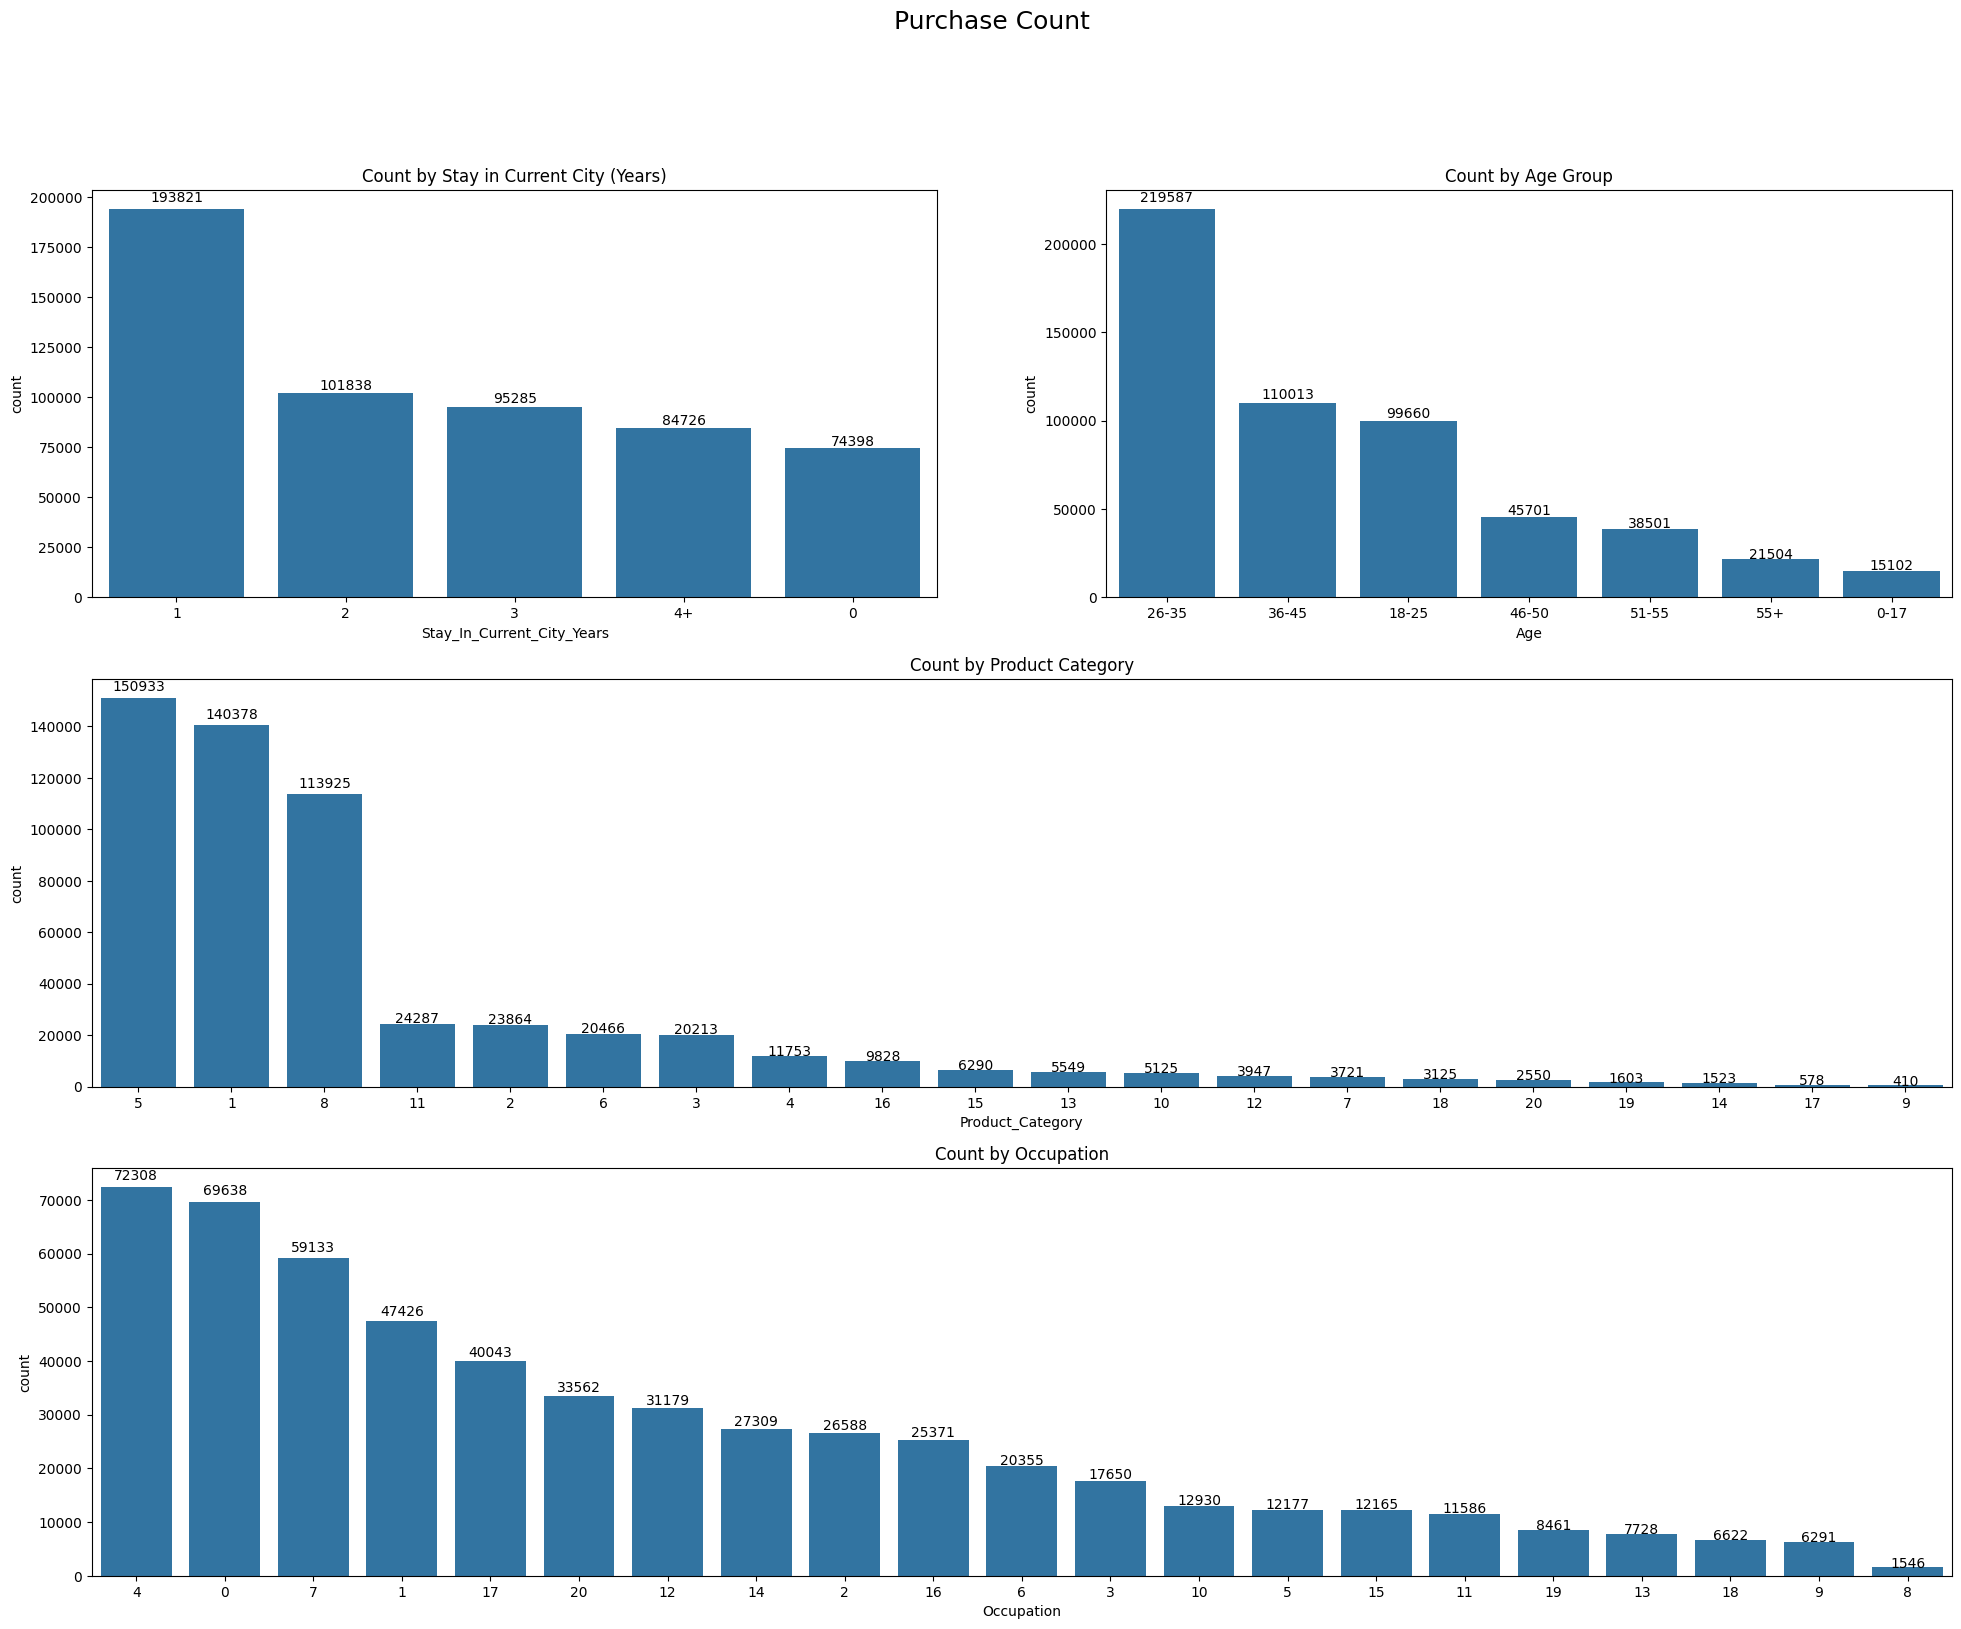

In [ ]:
plt.figure(figsize=(24,18)).suptitle('Purchase Count',fontsize=18)

plt.subplot(3,2,1)
plt.title('Count by Stay in Current City (Years)', fontsize=12)
g1 = sns.countplot(df, x='Stay_In_Current_City_Years', order=df['Stay_In_Current_City_Years'].value_counts().index)
for p in g1.patches:
  g1.text(x = p.get_x()+p.get_width()/2, y = p.get_height()*1.02, ha = 'center', s = round(p.get_height()))

plt.subplot(3,2,2)
plt.title('Count by Age Group', fontsize=12)
g1 = sns.countplot(df, x='Age', order=df['Age'].value_counts().index)
for p in g1.patches:
  g1.text(x = p.get_x()+p.get_width()/2, y = p.get_height()*1.02, ha = 'center', s = round(p.get_height()))

plt.subplot(3,1,2)
plt.title('Count by Product Category', fontsize=12)
g1 = sns.countplot(df, x='Product_Category', order=df['Product_Category'].value_counts().index)
for p in g1.patches:
  g1.text(x = p.get_x()+p.get_width()/2, y = p.get_height()*1.02, ha = 'center', s = round(p.get_height()))

plt.subplot(3,1,3)
plt.title('Count by Occupation', fontsize=12)
g1 = sns.countplot(df, x='Occupation', order=df['Occupation'].value_counts().index)
for p in g1.patches:
  g1.text(x = p.get_x()+p.get_width()/2, y = p.get_height()*1.02, ha = 'center', s = round(p.get_height()))

plt.show()

- **Stay in Current City Years** :

  - People who have stayed in their city for only 1 year made more purchases than others.

  - People who have stayed for less than a year or more than 4 years made least number of purchases.

- **Age** :

  - People in age group '26–35' made more purchases than any other age group.

  - People in age group '0-17' made less purchases than any other age group.

- **Product Category** :

  - Product categories 5, 1 and 8 sell more than other categories.

  - Product categories 17 and 9 sell the least.

- **Occupation** :

  - People belonging to Occupations 0, 4 and 7 made more purchases than others.

  - People belonging to Occupation 8 made less purchases.

### Top 10 Products Purchased

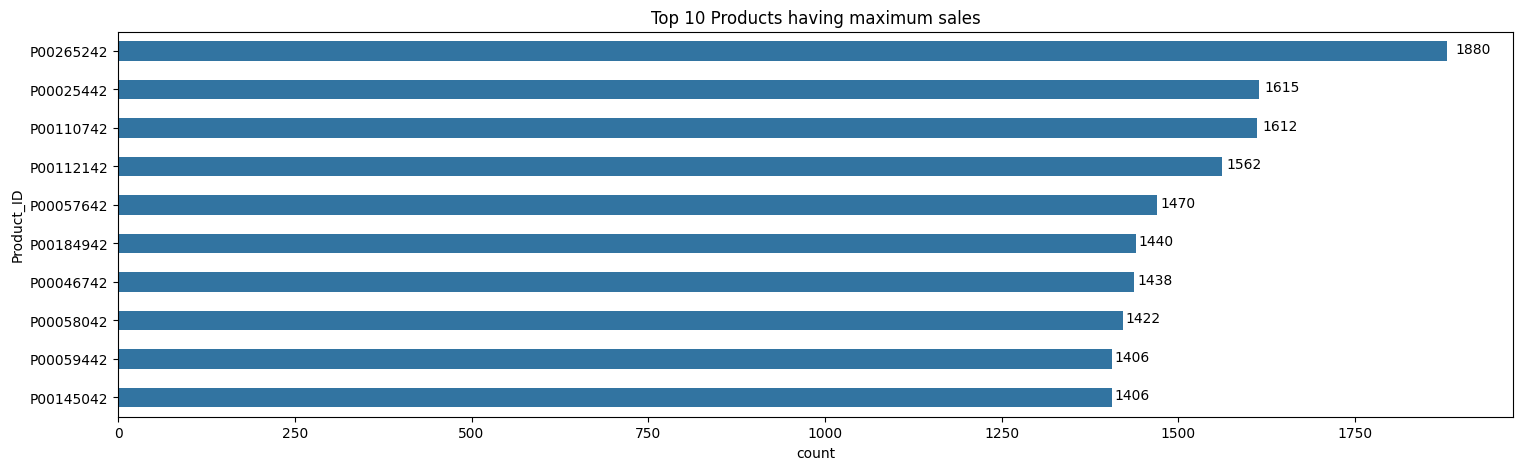

In [22]:
plt.figure(figsize=(18,5))
plt.title('Top 10 Products having maximum sales', fontsize=12)
g1 = sns.barplot(x=df['Product_ID'].value_counts().head(10), y=df['Product_ID'].value_counts().head(10).index, width=0.5)
for p in g1.patches:
  g1.text(x = (p.get_x()+p.get_width())*1.02, y = p.get_y() + p.get_height() - 0.2 , ha = 'center', s = round(p.get_width()))

- Products P00265242, P00025442, P00110742 were sold by most of the people.

- P00265242 is the top selling product.

### Least Popular Products

In [28]:
prod_df = df['Product_ID'].value_counts().reset_index(name='Count')
prod_df.tail()

Product_ID  Count
3626  P00314842      1
3627  P00298842      1
3628  P00231642      1
3629  P00204442      1
3630  P00066342      1

In [27]:
len(prod_df[prod_df['Count'] == 1])

144

- P00066342, P00204442, P00231642 etc. are some of the slow moving products.

- There are total of 144 products that have only 1 purchase.

### Purchase Distribution

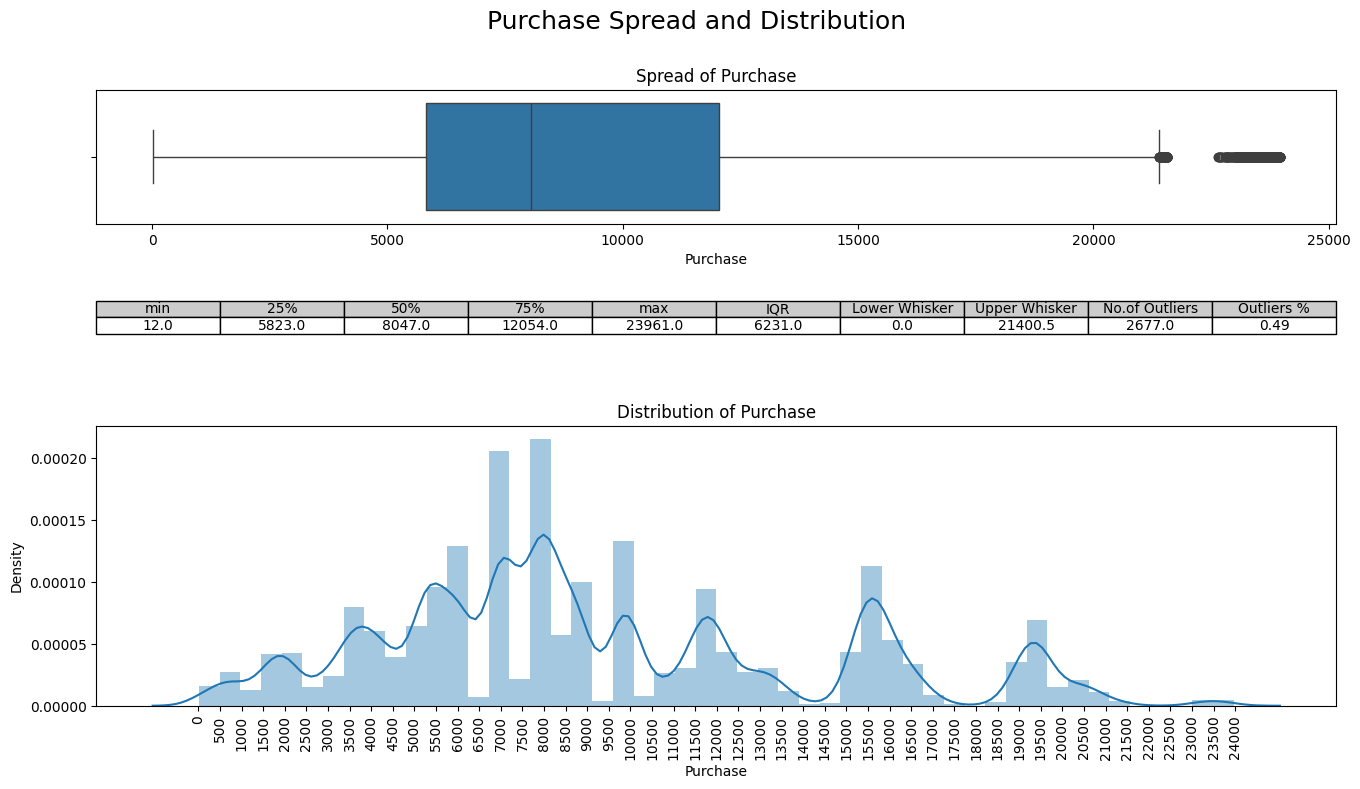

In [25]:
plt.figure(figsize=(16,8)).suptitle('Purchase Spread and Distribution',fontsize=18)

plt.subplot(4,1,1)
plt.title('Spread of Purchase', fontsize=12)
sns.boxplot(df, x='Purchase')

purchase_box_statistics = round(df['Purchase'].describe(),2)
purchase_box_statistics['IQR'] = purchase_box_statistics['75%'] - purchase_box_statistics['25%']
purchase_box_statistics['Lower Whisker'] = purchase_box_statistics['25%'] - 1.5*purchase_box_statistics['IQR'] if (purchase_box_statistics['25%'] > 1.5*purchase_box_statistics['IQR']) else 0
purchase_box_statistics['Upper Whisker'] = purchase_box_statistics['75%'] + 1.5*purchase_box_statistics['IQR']
purchase_box_statistics['No.of Outliers'] = len(df[df['Purchase'] > purchase_box_statistics['Upper Whisker']])
purchase_box_statistics['Outliers %'] = ((purchase_box_statistics['No.of Outliers']/df.shape[0])*100).round(2)
purchase_box_statistics.drop(labels=['count','mean','std',], inplace=True)

plt.subplot(4,1,2)
plt.table(colLabels=purchase_box_statistics.index, cellText=[purchase_box_statistics.values], cellLoc='center', loc='center', colColours=['0.8' for i in range(len(purchase_box_statistics.index))])
plt.axis('off')

plt.subplot(2,1,2)
plt.title('Distribution of Purchase', fontsize=12)
sns.distplot(df['Purchase'], kde=True)
plt.xticks(np.arange(0, np.max(df['Purchase'])+500, 500), rotation=90)

plt.show()

- Range of purchase amount is 12 dollars to 23961 dollars.

- Median purchase amount is 8047 dollars.

- Q1 : 0 to 5823 dollars.

- Q2 : 5823 to 8047 dollars.

- Q3 : 8047 to 12054 dollars.

- Q4 : 12054 to 21400 dollars.

- Inter quartile range of purchase amount is from 5823 to 12054 dollars i.e., 6231 dollars.

- There are 2677 Outliers in the data i.e., 0.49% of the data.

- Most people made there purchases in the range 7500 to 8000 dollars.

- Purchase amounts between 5000 to 10000 are maximum in number.

- Purchase amounts range between 0 and 24000.

### Purchase Spread

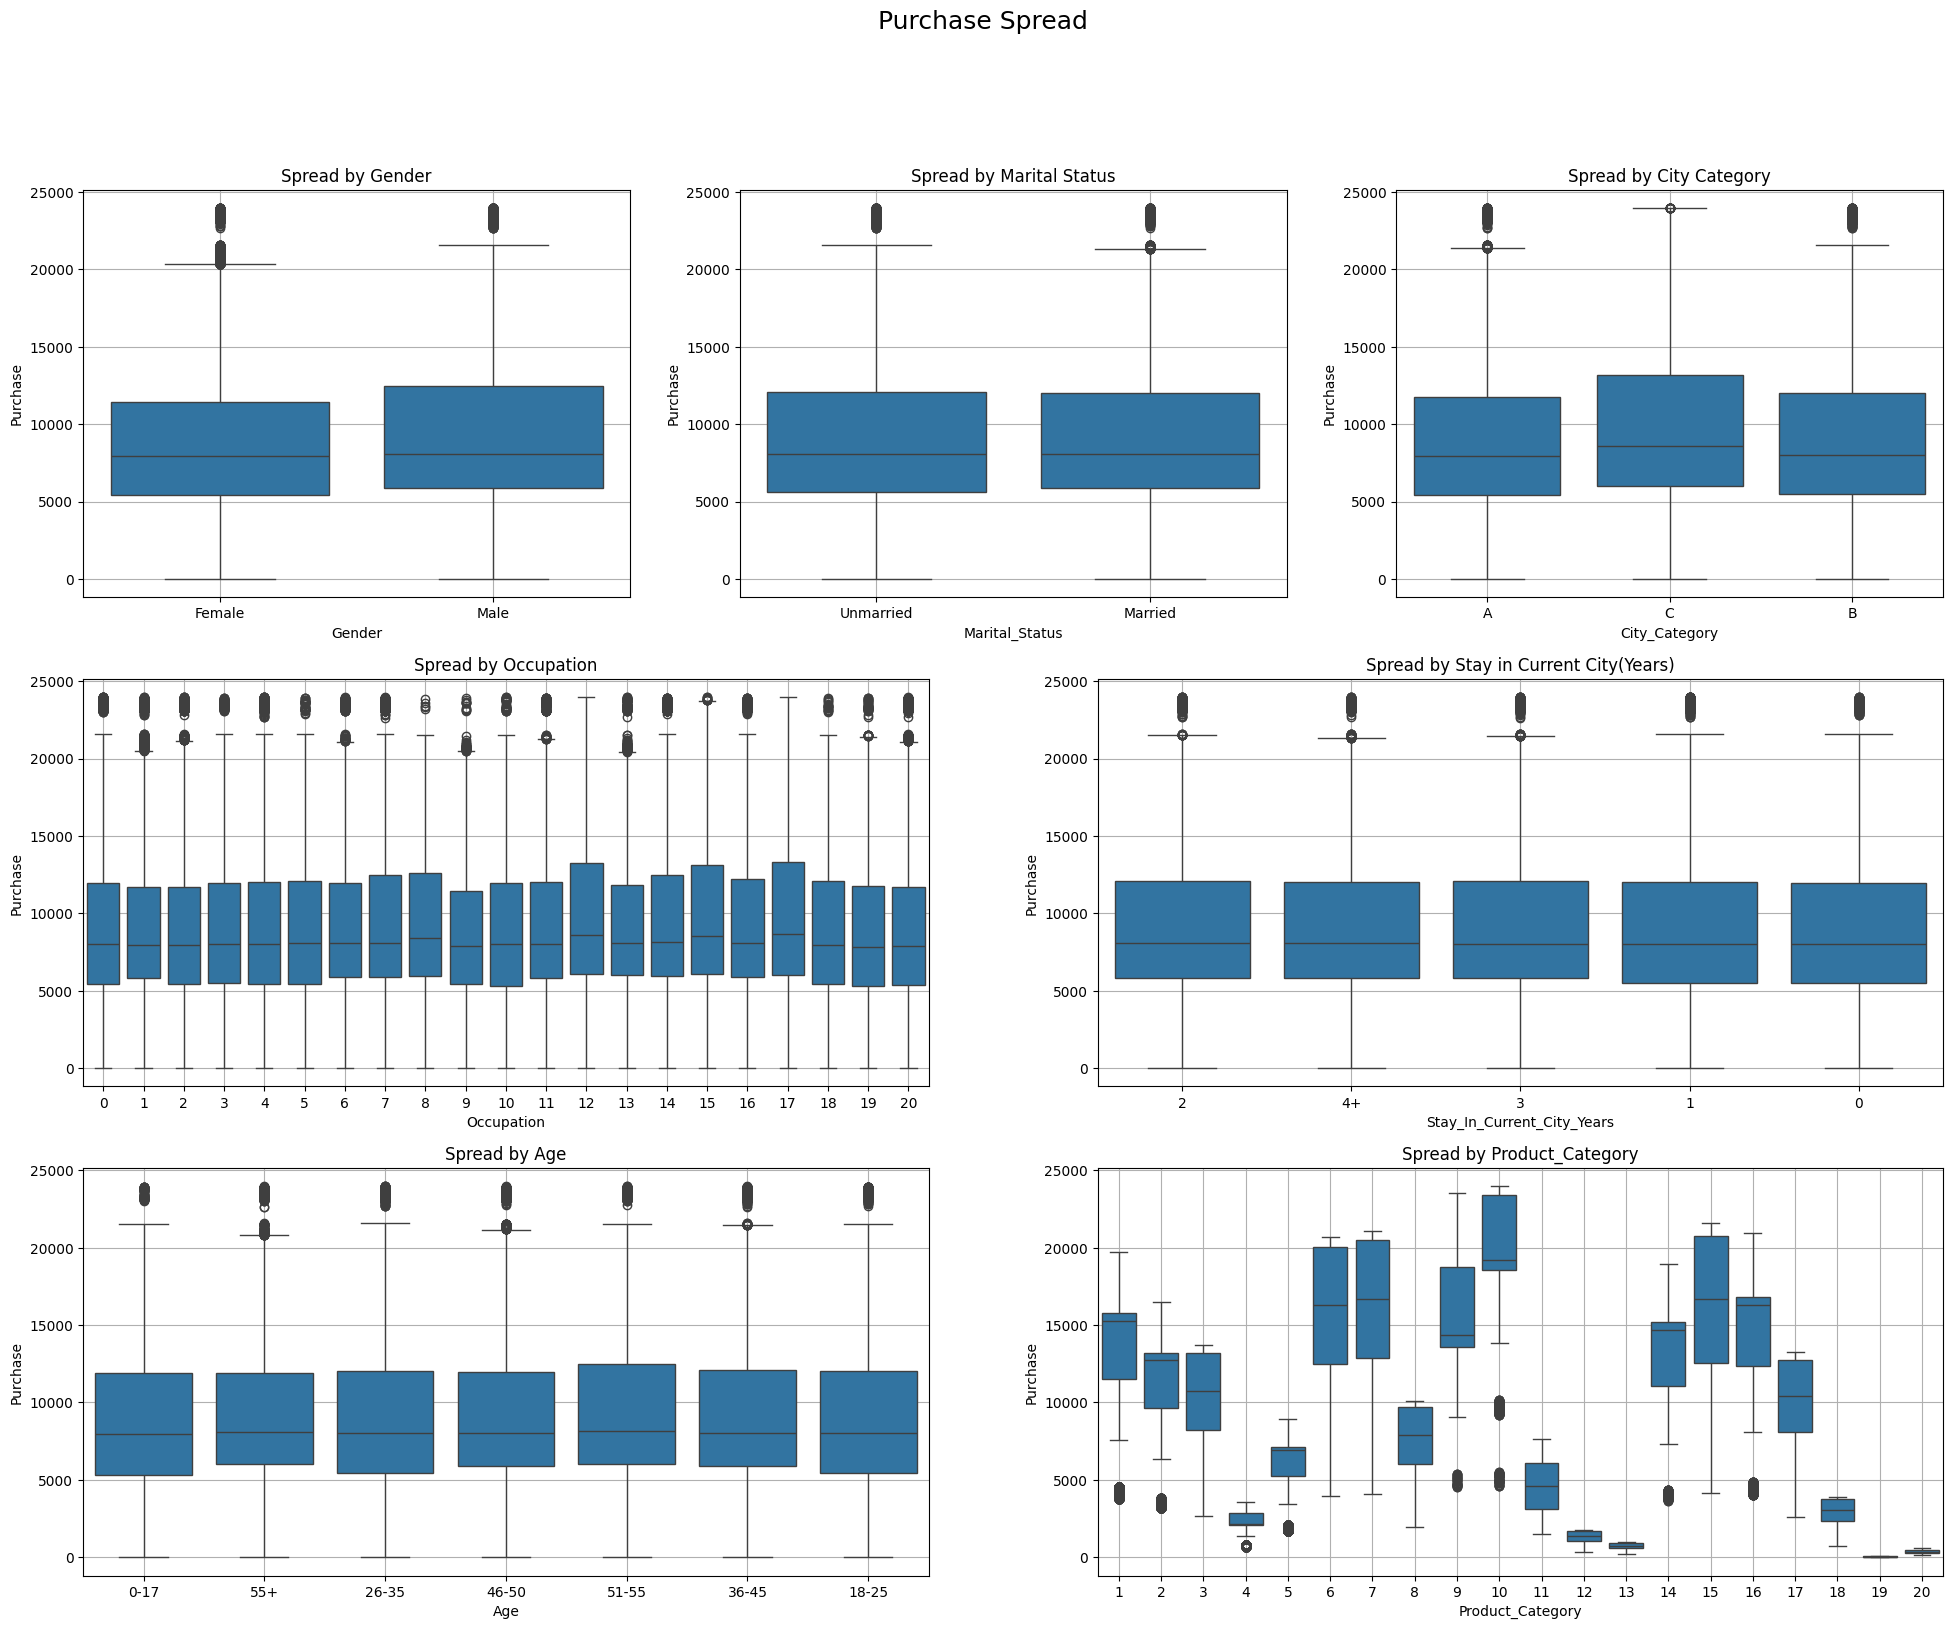

In [ ]:
plt.figure(figsize=(24,18)).suptitle('Purchase Spread',fontsize=18)

plt.subplot(3,3,1)
plt.title('Spread by Gender', fontsize=12)
sns.boxplot(df, y='Purchase', x='Gender')
plt.grid()

plt.subplot(3,3,2)
plt.title('Spread by Marital Status', fontsize=12)
sns.boxplot(df, y='Purchase', x='Marital_Status')
plt.grid()

plt.subplot(3,3,3)
plt.title('Spread by City Category', fontsize=12)
sns.boxplot(df, y='Purchase', x='City_Category')
plt.grid()

plt.subplot(3,2,3)
plt.title('Spread by Occupation', fontsize=12)
sns.boxplot(df, y='Purchase', x='Occupation')
plt.grid()

plt.subplot(3,2,4)
plt.title('Spread by Stay in Current City(Years)', fontsize=12)
sns.boxplot(df, y='Purchase', x='Stay_In_Current_City_Years')
plt.grid()

plt.subplot(3,2,5)
plt.title('Spread by Age', fontsize=12)
sns.boxplot(df, y='Purchase', x='Age')
plt.grid()

plt.subplot(3,2,6)
plt.title('Spread by Product_Category', fontsize=12)
sns.boxplot(df, y='Purchase', x='Product_Category')
plt.grid()

plt.show()

- Median purchase amounts of males and females are similar.

- Median purchase amounts of all age groups are similar.

- Median purchase amount of city of category C is slightly higher than other city categories.

- Median purchase amounts of product category 10 is highest, category 19 is lowest.

- Median purchase amount of occupations 12 and 17 are slightly higher than other occupations.

## Sampling for CLT and CI

In [86]:
def sampling_clt(parameter,size):

  print("\033[1m" + '\033[3m' + 'CLT for Purchase Amount with respect to '+parameter + "\033[0m")
  print("\033[1m" + '\033[3m' + 'Sample Size: '+str(size)+ "\033[0m")
  print('\n')

  plt.figure(figsize=(20,8)).suptitle('Sampling of Purchase Amount by '+ parameter + ' with sample size of ' + str(size),fontsize=18)

  variables = np.sort(df[parameter].unique())

  pop_mean=[]
  pop_std_dev=[]
  samp_mean=[]
  samp_std_dev=[]
  CI99=[]
  CI95=[]
  CI90=[]

  np.random.seed(12345)

  for i in range(len(variables)):

    pop = df[df[parameter]==variables[i]]['Purchase']
    means = []
    for j in range(100):
        means.append(np.random.choice(pop,size).mean())

    print("\033[1m" + '\033[4m' + variables[i] + '\033[0m')

    pm = np.mean(pop).round(2)
    pop_mean.append(pm)
    print('Population Mean: '+str(pm))

    psd = np.std(pop).round(2)
    pop_std_dev.append(psd)
    print('Population Standard Deviation: '+str(psd))

    sm = np.mean(means).round(2)
    samp_mean.append(sm)
    print('Sample Mean: '+str(sm))

    std = np.std(means).round(2)
    samp_std_dev.append(std)
    print('Sample Standard Deviation: '+str(std))

    ci90 = (np.percentile(means, 5).round(2), np.percentile(means, 95).round(2))
    CI90.append(ci90)
    print('90% Confidence Interval: '+str(ci90))

    ci95 = (np.percentile(means, 2.5).round(2), np.percentile(means, 97.5).round(2))
    CI95.append(ci95)
    print('95% Confidence Interval: '+str(ci95))

    ci99 = (np.percentile(means, 0.5).round(2), np.percentile(means, 99.5).round(2))
    CI99.append(ci99)
    print('99% Confidence Interval: '+str(ci99))

    print('\n')

    plt.subplot(1,3,1)
    plt.title('Distribution of Sample', fontsize=12)
    sns.kdeplot(x = means, color = 'C'+str(i), label=variables[i], fill=True)
    plt.legend()

  rows = ['Population Mean', 'Population Std. Dev.', 'Sample Mean', 'Sample Std. Dev.', '90% CI', '95% CI', '99% CI']
  data=[pop_mean, pop_std_dev, samp_mean, samp_std_dev, CI99, CI95, CI90]

  plt.subplot(1,2,2)
  plt.title('Metrics of Sample', fontsize=12)
  table = plt.table(colLabels = variables, rowLabels = rows, cellText = data, cellLoc='center', loc='center', rowColours=['0.8' for i in range(len(rows))], colColours=['C'+str(i) for i in range(len(variables))])
  table.scale(1.5, 4.5)
  plt.axis('off')

  plt.show()

This is the function that is used to apply CLT (Continuous Limit Theorem) and gives 90%, 95% and 99% CIs (Confidence Intervals) on a sample of given sizen based on the given input parameter.

## Gender vs Purchase Amount

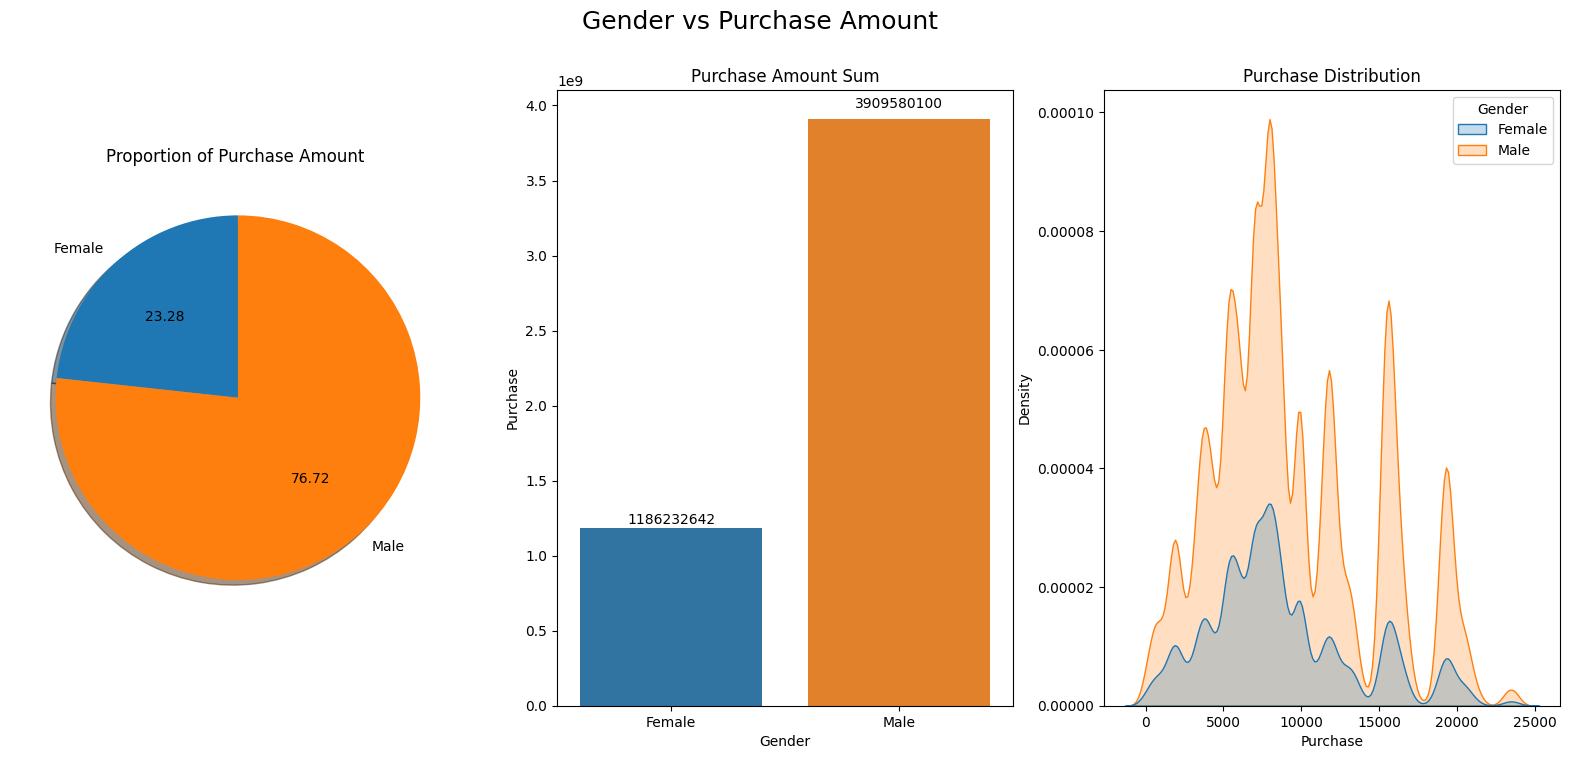

In [ ]:
plt.figure(figsize=(20,8)).suptitle('Gender vs Purchase Amount',fontsize=18)

index = df.groupby('Gender')['Purchase'].sum().index
values = df.groupby('Gender')['Purchase'].sum()

plt.subplot(1,3,1)
plt.title('Proportion of Purchase Amount ', fontsize=12)
plt.pie(x = values,
        labels = index,
        startangle = 90,
        shadow = True,
        autopct = '%.2f')

plt.subplot(1,3,2)
plt.title('Purchase Amount Sum', fontsize=12)
g = sns.barplot(x = index, y = values, palette=['C'+str(i) for i in range(len(index))])
for p in g.patches:
  g.text(x = p.get_x()+p.get_width()/2, y = p.get_height()*1.02, ha = 'center', s = round(p.get_height()))


plt.subplot(1,3,3)
plt.title('Purchase Distribution', fontsize=12)
sns.kdeplot(df, x='Purchase', hue='Gender', fill=True)

plt.show()

- Males contributes to almost 77% of the total sales of the Wallmart by purchasing products worth approximately 3.9 billion USD

- Females contributes to 23% of the total sales of the Wallmart by purchasing products worth approximately 1.2 billion USD

### CLT for Sample of size 300

CLT for Purchase Amount with respect to Gender
Sample Size: 300


Female
Population Mean: 8734.57
Population Standard Deviation: 4767.22
Sample Mean: 8733.64
Sample Standard Deviation: 272.39
90% Confidence Interval: (8311.39, 9154.13)
95% Confidence Interval: (8200.95, 9202.08)
99% Confidence Interval: (8083.26, 9251.76)


Male
Population Mean: 9437.53
Population Standard Deviation: 5092.18
Sample Mean: 9448.37
Sample Standard Deviation: 302.68
90% Confidence Interval: (8982.94, 9952.12)
95% Confidence Interval: (8944.11, 10000.35)
99% Confidence Interval: (8737.42, 10072.85)




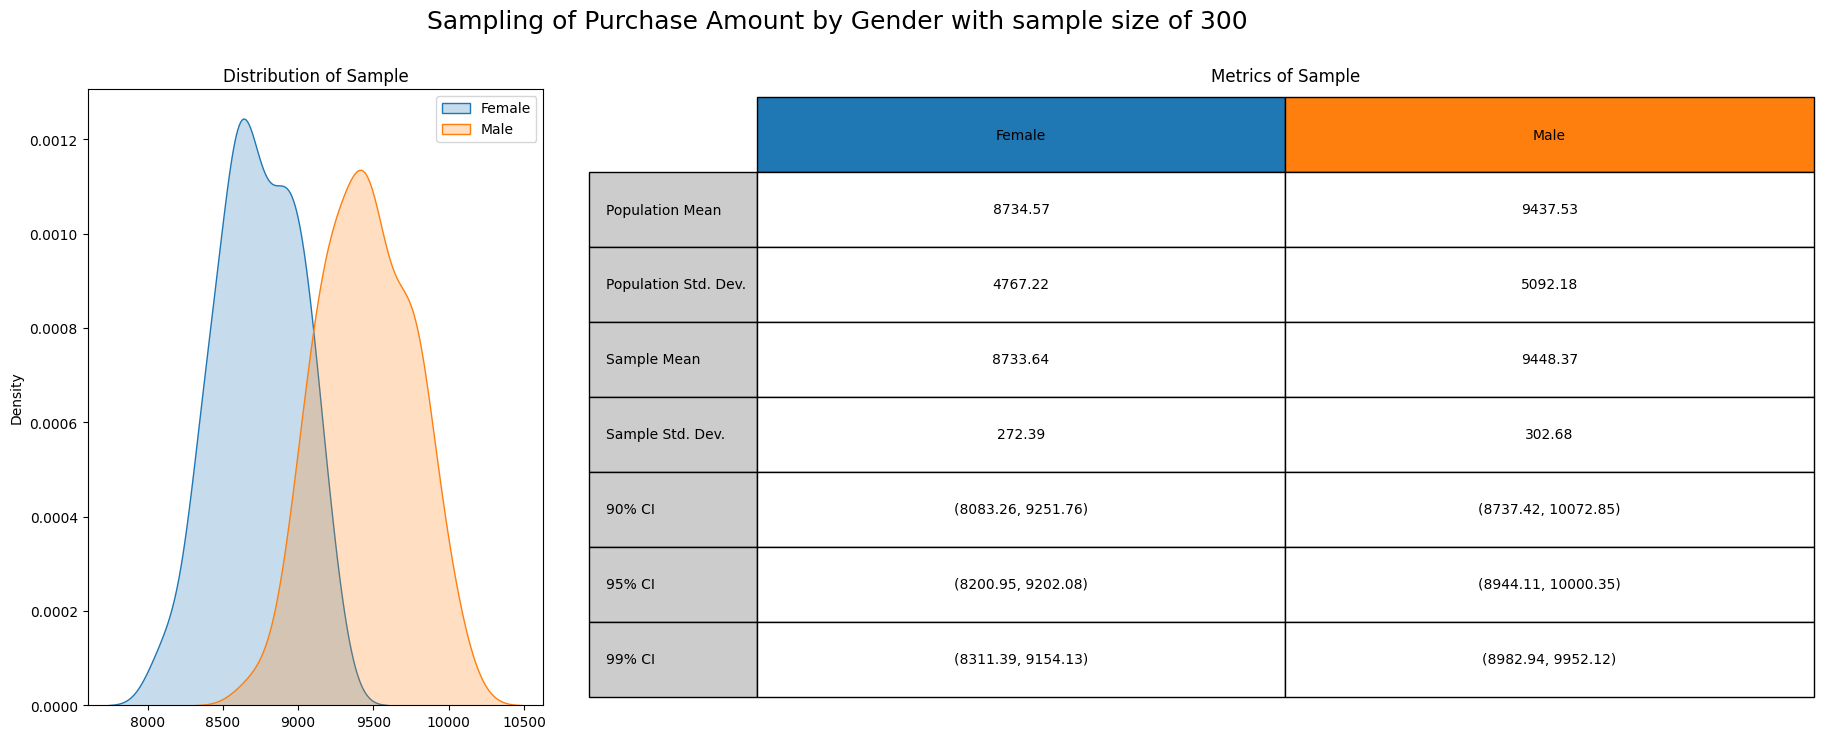

In [87]:
sampling_clt(parameter='Gender', size=300)

### CLT for Sample of size 3000

CLT for Purchase Amount with respect to Gender
Sample Size: 3000


Female
Population Mean: 8734.57
Population Standard Deviation: 4767.22
Sample Mean: 8728.59
Sample Standard Deviation: 92.91
90% Confidence Interval: (8561.41, 8883.19)
95% Confidence Interval: (8531.1, 8895.27)
99% Confidence Interval: (8491.37, 8915.3)


Male
Population Mean: 9437.53
Population Standard Deviation: 5092.18
Sample Mean: 9440.03
Sample Standard Deviation: 86.81
90% Confidence Interval: (9304.6, 9587.84)
95% Confidence Interval: (9269.02, 9603.46)
99% Confidence Interval: (9250.24, 9642.24)




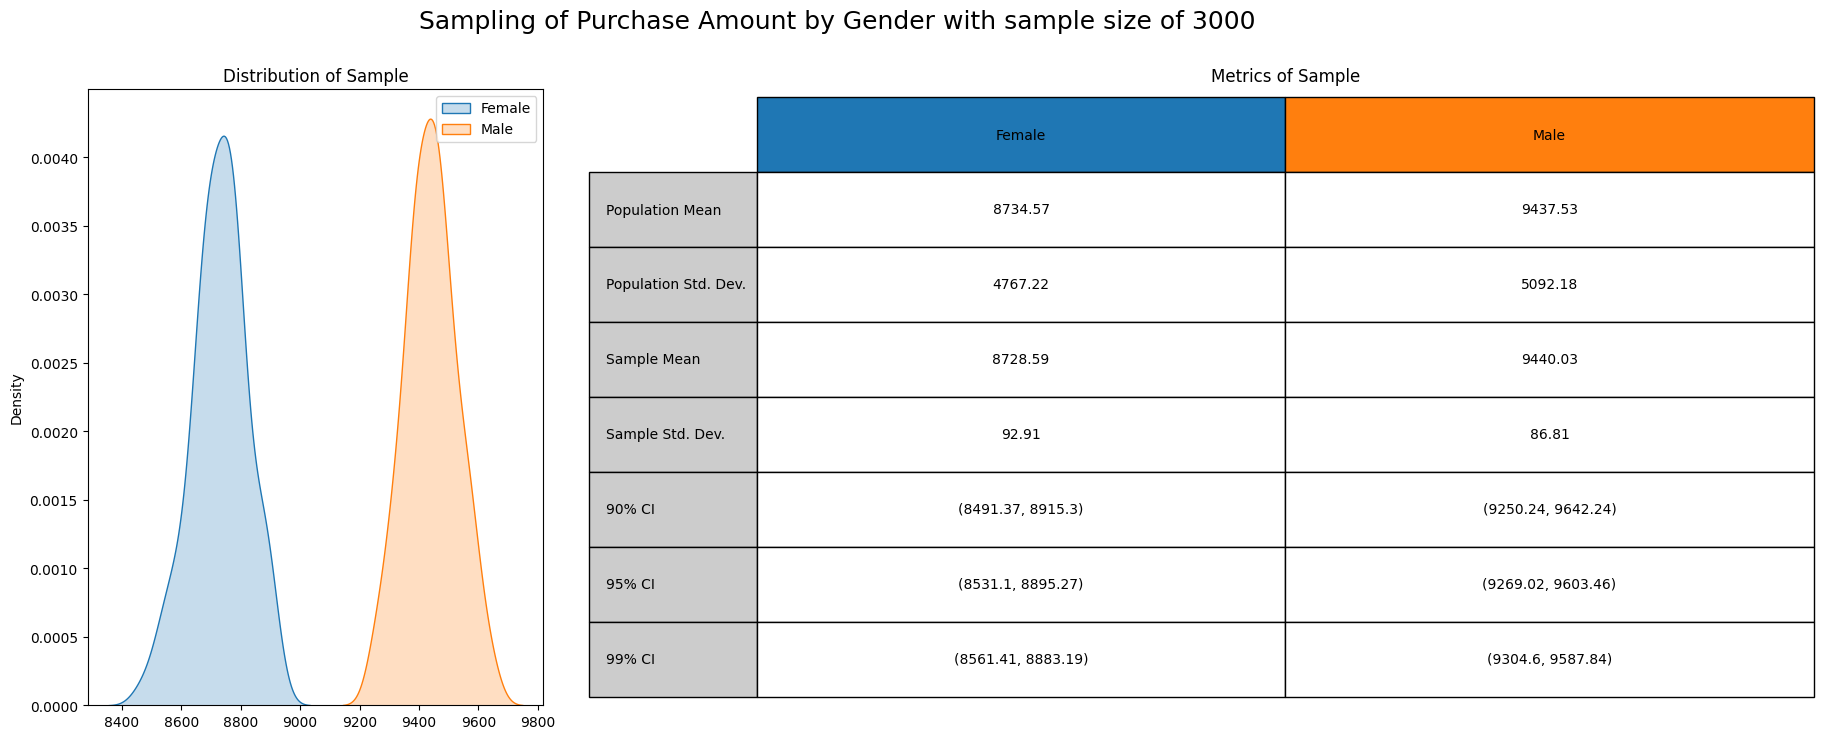

In [88]:
sampling_clt(parameter='Gender', size=3000)

### CLT for Sample of size 30000

CLT for Purchase Amount with respect to Gender
Sample Size: 30000


Female
Population Mean: 8734.57
Population Standard Deviation: 4767.22
Sample Mean: 8735.56
Sample Standard Deviation: 27.13
90% Confidence Interval: (8692.63, 8779.5)
95% Confidence Interval: (8685.51, 8784.23)
99% Confidence Interval: (8681.17, 8802.78)


Male
Population Mean: 9437.53
Population Standard Deviation: 5092.18
Sample Mean: 9443.52
Sample Standard Deviation: 31.1
90% Confidence Interval: (9399.32, 9497.05)
95% Confidence Interval: (9394.07, 9507.41)
99% Confidence Interval: (9368.73, 9518.24)




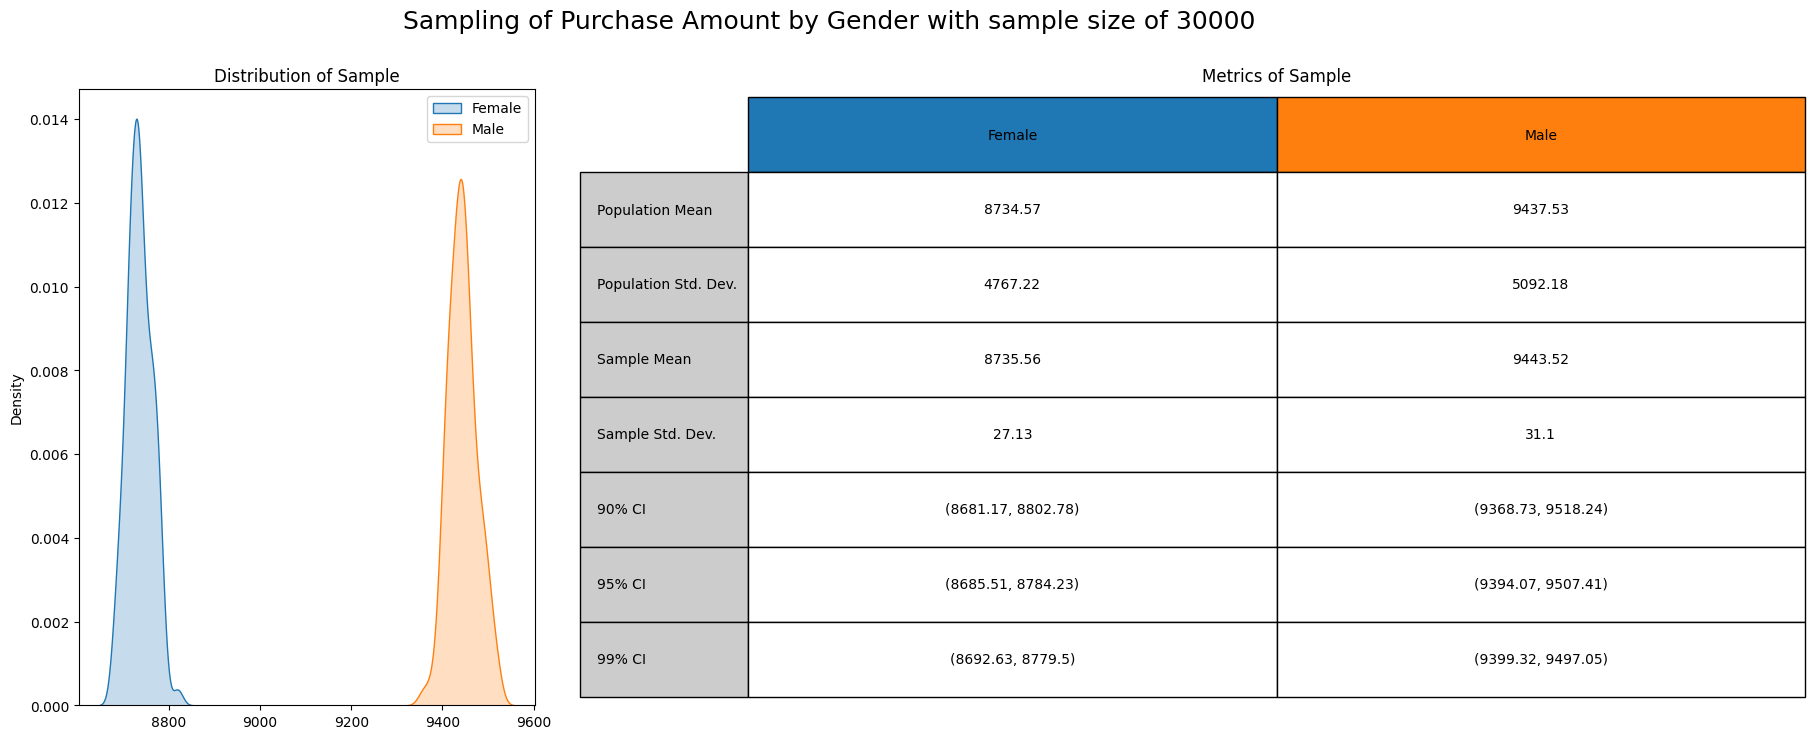

In [89]:
sampling_clt(parameter='Gender', size=30000)

## Marital Status vs Purchase Amount

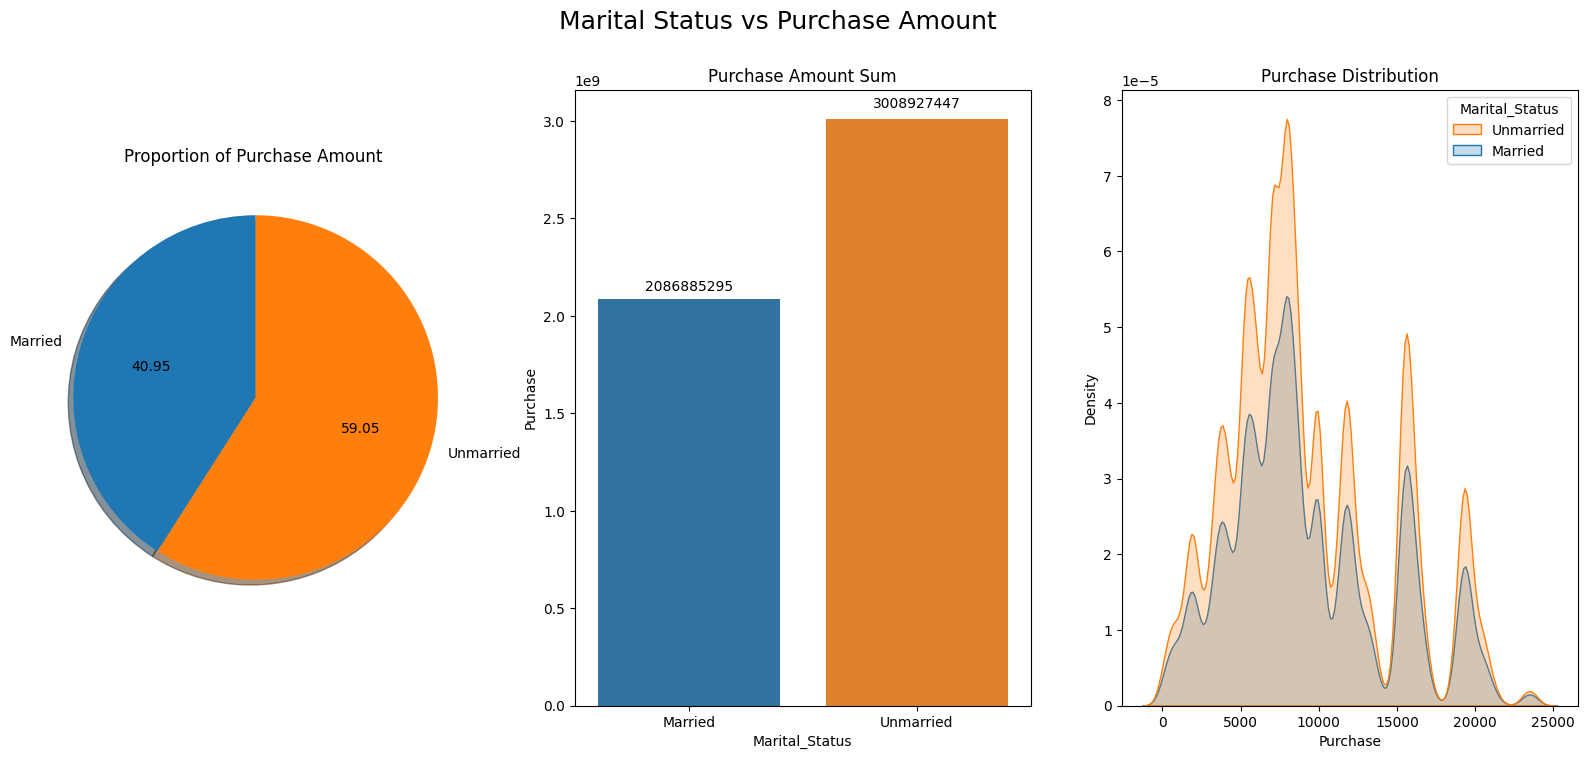

In [49]:
plt.figure(figsize=(20,8)).suptitle('Marital Status vs Purchase Amount',fontsize=18)

index = df.groupby('Marital_Status')['Purchase'].sum().index
values = df.groupby('Marital_Status')['Purchase'].sum()
plt.subplot(1,3,1)
plt.title('Proportion of Purchase Amount ', fontsize=12)
plt.pie(x = values,
        labels = index,
        startangle = 90,
        shadow = True,
        autopct = '%.2f')

plt.subplot(1,3,2)
plt.title('Purchase Amount Sum', fontsize=12)
g = sns.barplot(x = index, y = values, palette=['C'+str(i) for i in range(len(index))])
for p in g.patches:
  g.text(x = p.get_x()+p.get_width()/2, y = p.get_height()*1.02, ha = 'center', s = round(p.get_height()))


plt.subplot(1,3,3)
plt.title('Purchase Distribution', fontsize=12)
sns.kdeplot(df, x='Purchase', hue='Marital_Status', fill=True, palette={'Married':'C0', 'Unmarried':'C1'})

plt.show()

- Unmarried people contributes to almost 59% of the total sales of the Wallmart by purchasing products worth approximately 3 billion USD

- Married people contributes to 41% of the total sales of the Wallmart by purchasing products worth approximately 2.1 billion USD

### CLT for Sample of size 300

CLT for Purchase Amount with respect to Marital_Status
Sample Size: 300


Married
Population Mean: 9261.17
Population Standard Deviation: 5016.89
Sample Mean: 9289.44
Sample Standard Deviation: 301.98
90% Confidence Interval: (8758.42, 9759.74)
95% Confidence Interval: (8674.27, 9818.46)
99% Confidence Interval: (8527.1, 9922.61)


Unmarried
Population Mean: 9265.91
Population Standard Deviation: 5027.34
Sample Mean: 9300.33
Sample Standard Deviation: 256.39
90% Confidence Interval: (8883.68, 9718.99)
95% Confidence Interval: (8813.27, 9764.66)
99% Confidence Interval: (8680.59, 9868.31)




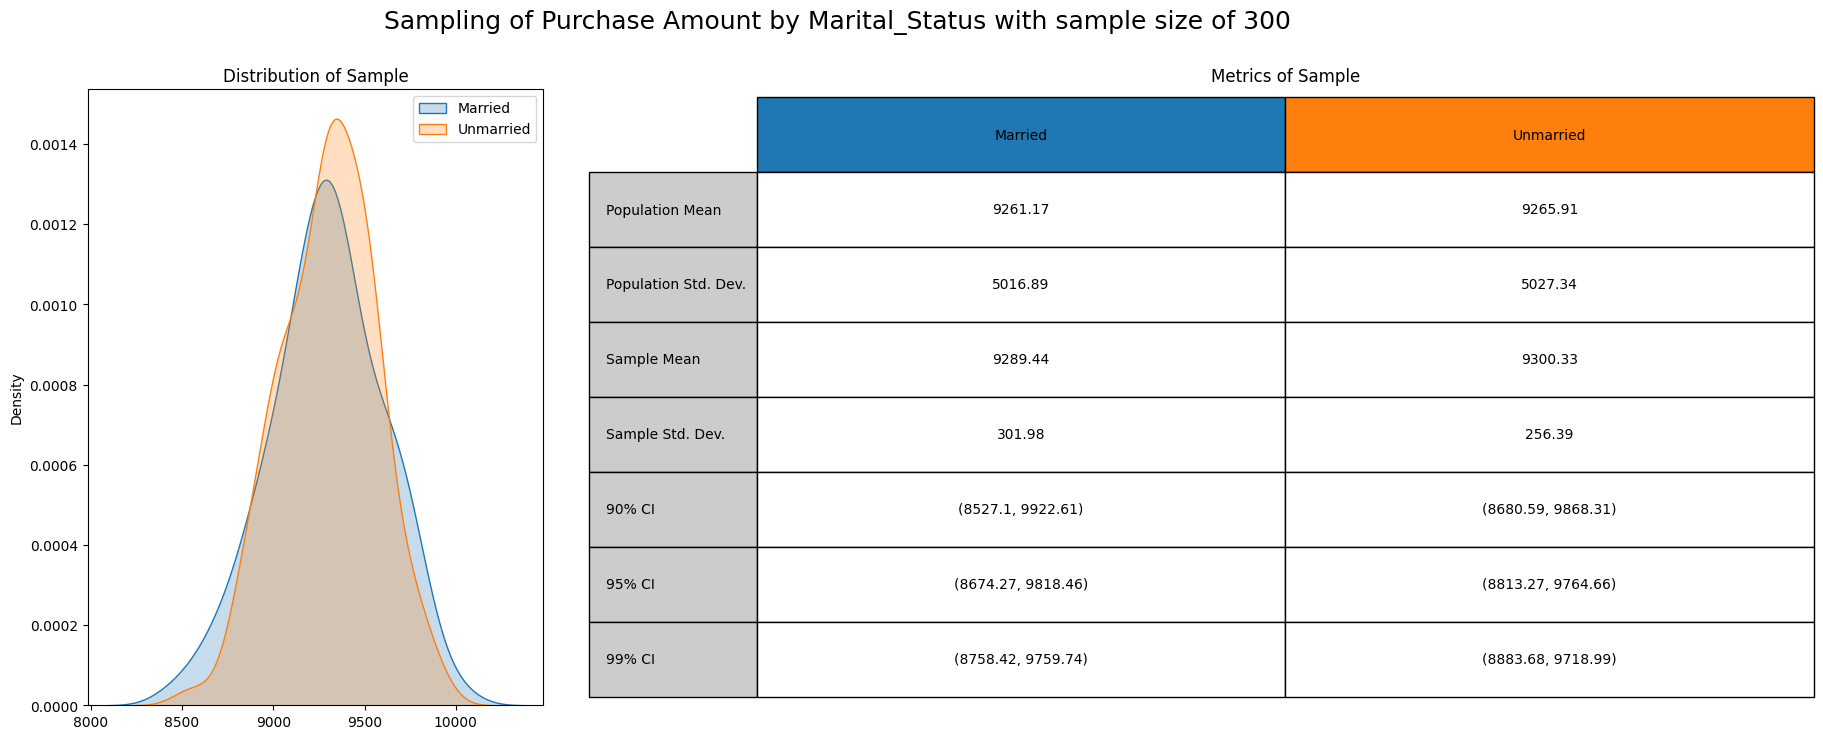

In [90]:
sampling_clt(parameter='Marital_Status', size=300)

### CLT for Sample of size 3000

CLT for Purchase Amount with respect to Marital_Status
Sample Size: 3000


Married
Population Mean: 9261.17
Population Standard Deviation: 5016.89
Sample Mean: 9252.63
Sample Standard Deviation: 87.62
90% Confidence Interval: (9107.32, 9386.53)
95% Confidence Interval: (9082.83, 9420.85)
99% Confidence Interval: (9052.91, 9455.18)


Unmarried
Population Mean: 9265.91
Population Standard Deviation: 5027.34
Sample Mean: 9267.3
Sample Standard Deviation: 96.47
90% Confidence Interval: (9128.02, 9457.89)
95% Confidence Interval: (9081.29, 9485.5)
99% Confidence Interval: (9062.45, 9498.77)




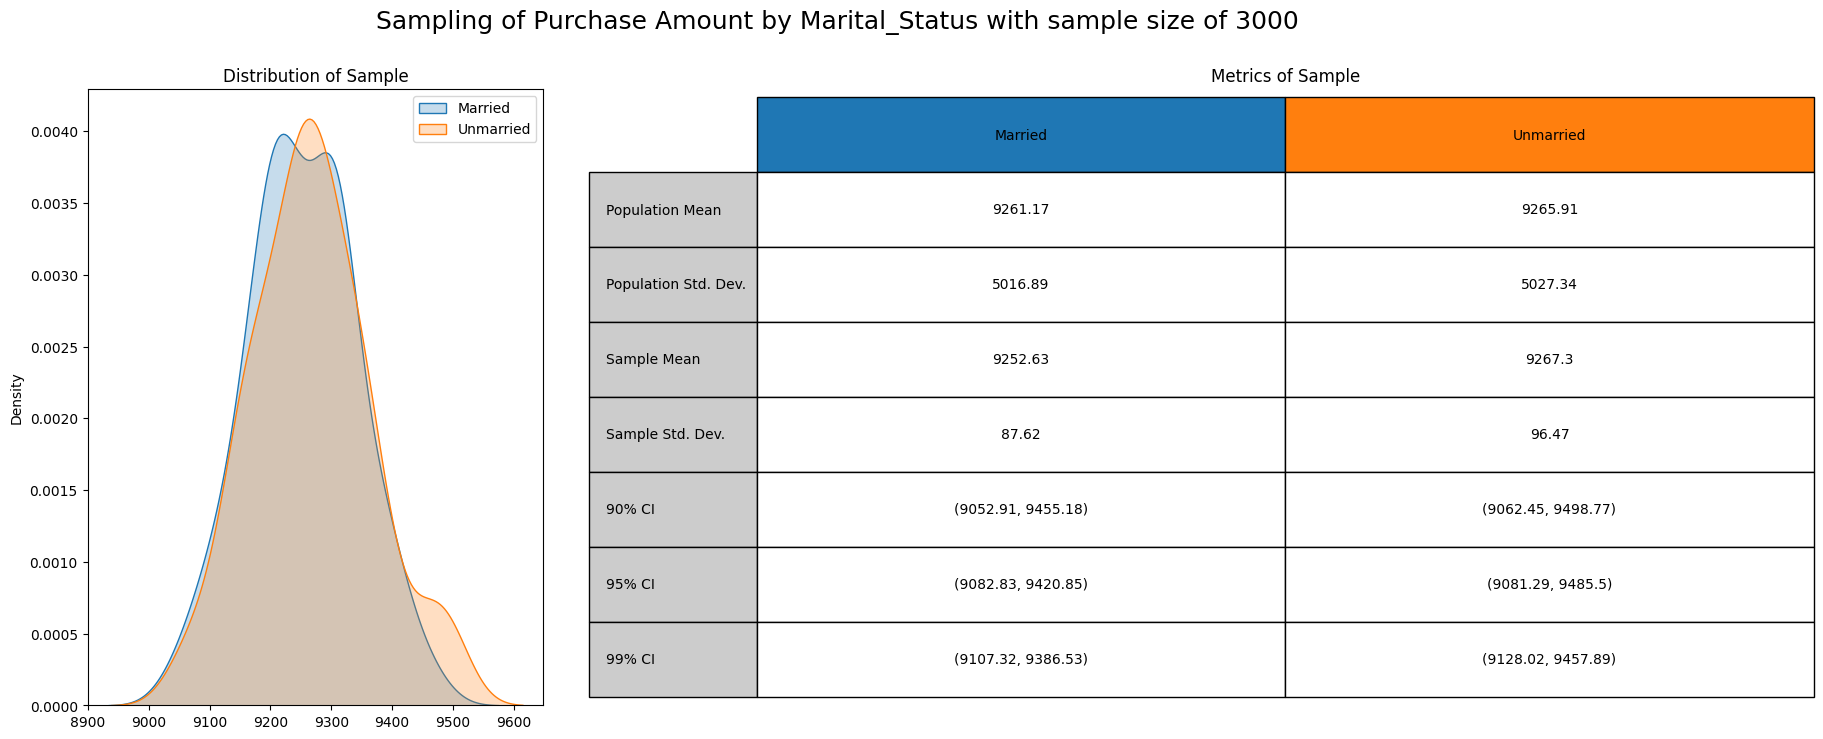

In [91]:
sampling_clt(parameter='Marital_Status', size=3000)

### CLT for Sample of size 30000

CLT for Purchase Amount with respect to Marital_Status
Sample Size: 30000


Married
Population Mean: 9261.17
Population Standard Deviation: 5016.89
Sample Mean: 9260.48
Sample Standard Deviation: 31.16
90% Confidence Interval: (9204.84, 9307.86)
95% Confidence Interval: (9193.14, 9315.17)
99% Confidence Interval: (9185.24, 9326.49)


Unmarried
Population Mean: 9265.91
Population Standard Deviation: 5027.34
Sample Mean: 9264.74
Sample Standard Deviation: 29.02
90% Confidence Interval: (9213.6, 9311.32)
95% Confidence Interval: (9209.17, 9314.58)
99% Confidence Interval: (9202.53, 9325.67)




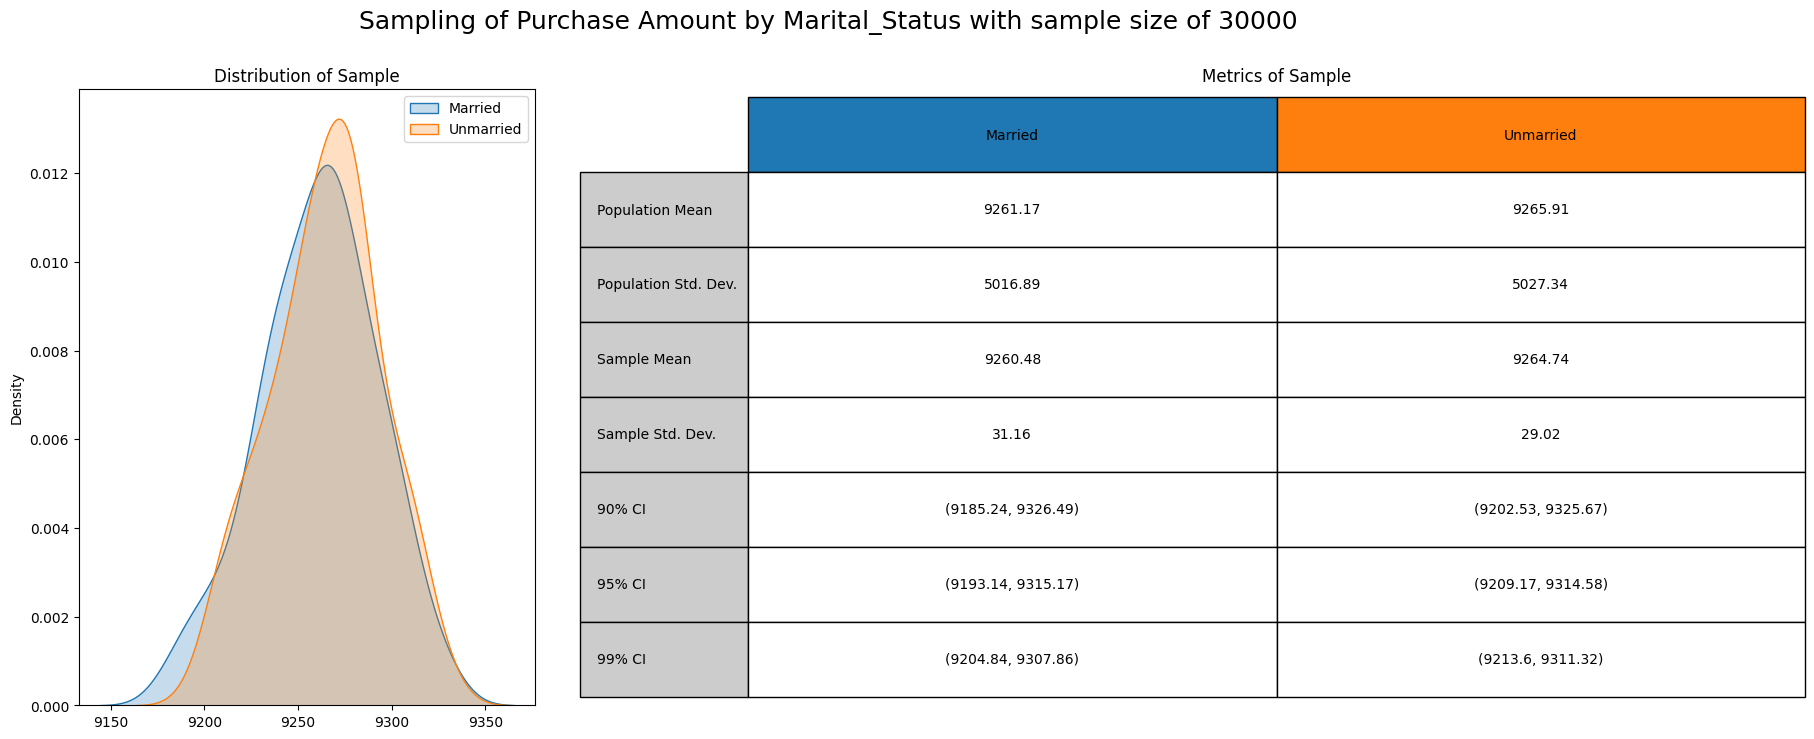

In [92]:
sampling_clt(parameter='Marital_Status', size=30000)

## Age vs Purchase Amount

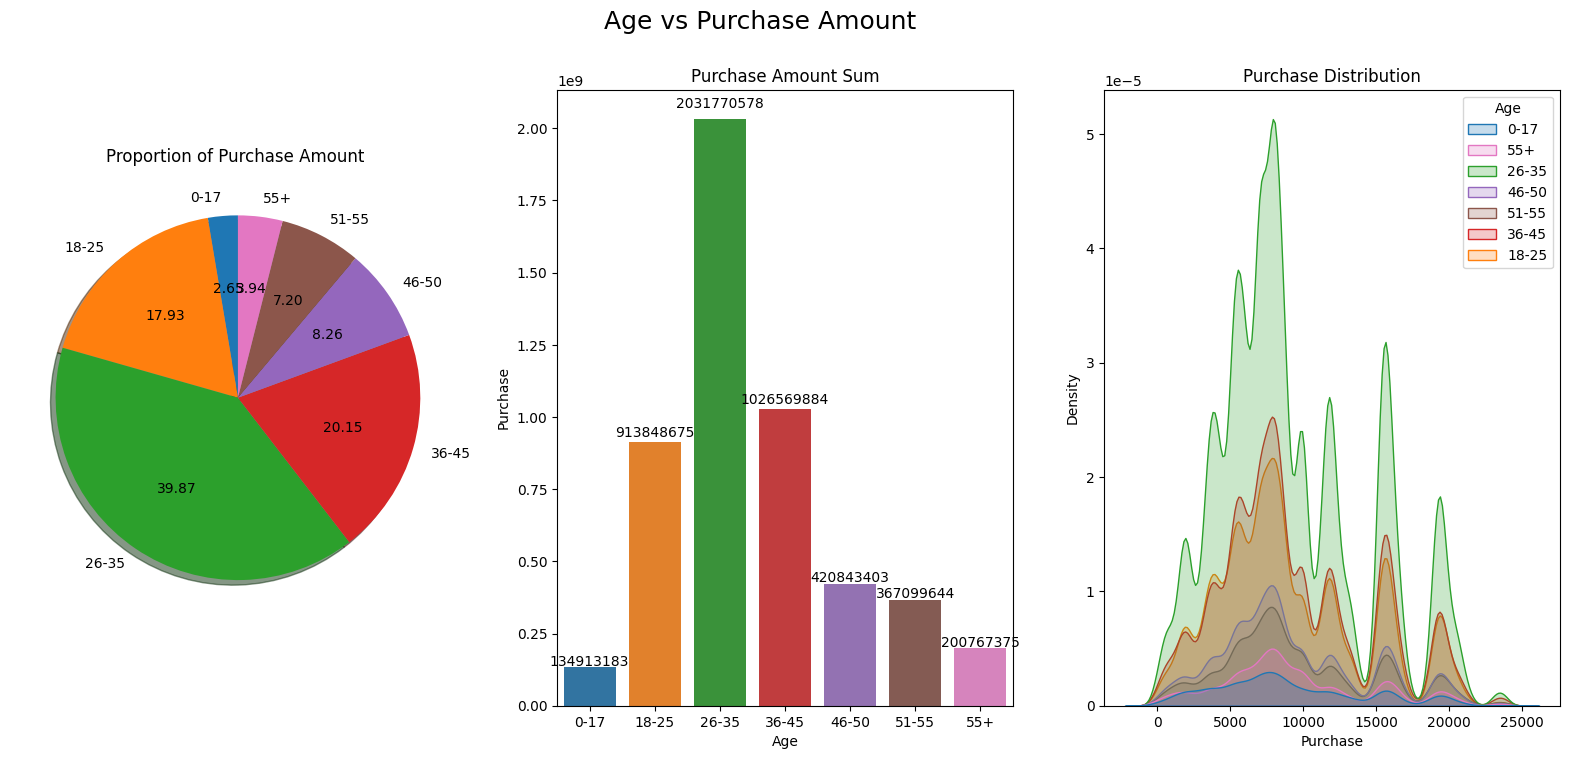

In [40]:
plt.figure(figsize=(20,8)).suptitle('Age vs Purchase Amount',fontsize=18)

index = df.groupby('Age')['Purchase'].sum().index
values = df.groupby('Age')['Purchase'].sum()

plt.subplot(1,3,1)
plt.title('Proportion of Purchase Amount ', fontsize=12)
plt.pie(x = values,
        labels = index,
        startangle = 90,
        shadow = True,
        autopct = '%.2f')

plt.subplot(1,3,2)
plt.title('Purchase Amount Sum', fontsize=12)
g = sns.barplot(x = index, y = values, palette=['C'+str(i) for i in range(len(index))])
for p in g.patches:
  g.text(x = p.get_x()+p.get_width()/2, y = p.get_height()*1.02, ha = 'center', s = round(p.get_height()))

plt.subplot(1,3,3)
plt.title('Purchase Distribution', fontsize=12)
a = np.sort(df['Age'].unique())
sns.kdeplot(df, x='Purchase', hue='Age', fill=True, palette=dict([(a[i],'C'+str(i)) for i in range(len(a))]))

plt.show()

- 40% of the total sales of the Wallmart were contributed 26-35 age group by purchasing products worth approximately 2 billion USD.

- 0-17 age groups stands as the least contributors of the sales with 2.6% purchasing rate i.e., 0.14 billion USD of total purchases.

### CLT for Sample of size 300

CLT for Purchase Amount with respect to Age
Sample Size: 300


0-17
Population Mean: 8933.46
Population Standard Deviation: 5110.94
Sample Mean: 8913.99
Sample Standard Deviation: 319.3
90% Confidence Interval: (8356.17, 9396.8)
95% Confidence Interval: (8210.9, 9433.79)
99% Confidence Interval: (8118.59, 9476.75)


18-25
Population Mean: 9169.66
Population Standard Deviation: 5034.3
Sample Mean: 9186.45
Sample Standard Deviation: 271.24
90% Confidence Interval: (8800.17, 9622.74)
95% Confidence Interval: (8749.34, 9686.39)
99% Confidence Interval: (8634.73, 9831.97)


26-35
Population Mean: 9252.69
Population Standard Deviation: 5010.52
Sample Mean: 9226.33
Sample Standard Deviation: 308.84
90% Confidence Interval: (8678.02, 9707.93)
95% Confidence Interval: (8633.75, 9766.32)
99% Confidence Interval: (8577.62, 10110.31)


36-45
Population Mean: 9331.35
Population Standard Deviation: 5022.9
Sample Mean: 9345.07
Sample Standard Deviation: 249.87
90% Confidence Interval: (8870.27, 9724.

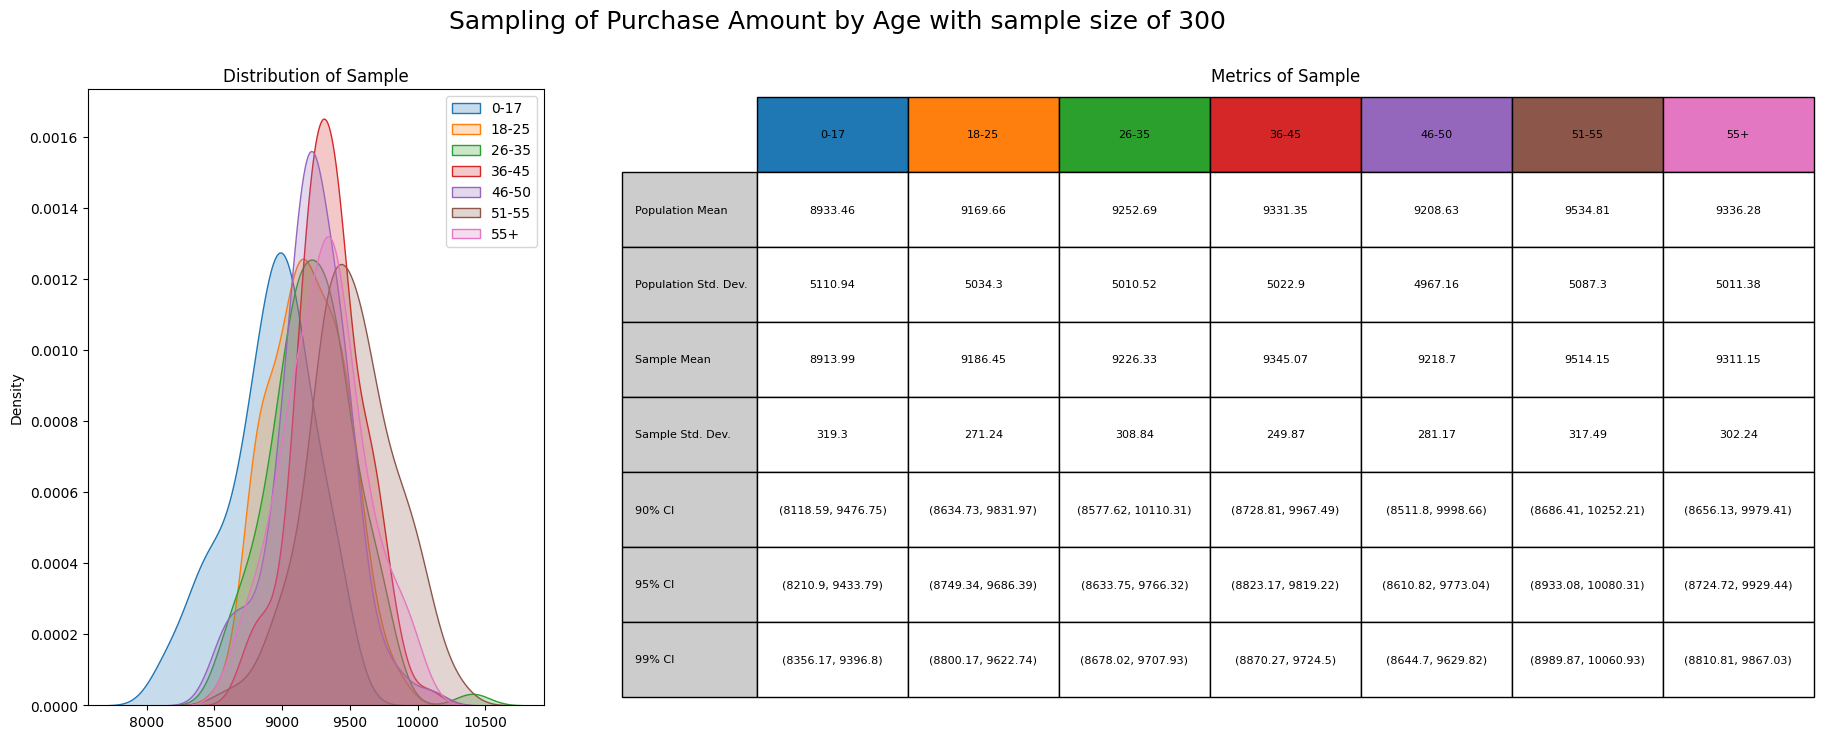

In [93]:
sampling_clt(parameter='Age', size=300)

### CLT for Sample of size 3000

CLT for Purchase Amount with respect to Age
Sample Size: 3000


0-17
Population Mean: 8933.46
Population Standard Deviation: 5110.94
Sample Mean: 8931.06
Sample Standard Deviation: 101.18
90% Confidence Interval: (8751.03, 9102.83)
95% Confidence Interval: (8720.52, 9152.02)
99% Confidence Interval: (8709.85, 9209.35)


18-25
Population Mean: 9169.66
Population Standard Deviation: 5034.3
Sample Mean: 9170.37
Sample Standard Deviation: 86.3
90% Confidence Interval: (9023.29, 9321.35)
95% Confidence Interval: (8994.83, 9342.59)
99% Confidence Interval: (8982.2, 9352.09)


26-35
Population Mean: 9252.69
Population Standard Deviation: 5010.52
Sample Mean: 9237.35
Sample Standard Deviation: 87.82
90% Confidence Interval: (9070.47, 9372.6)
95% Confidence Interval: (9052.75, 9388.35)
99% Confidence Interval: (9009.74, 9449.38)


36-45
Population Mean: 9331.35
Population Standard Deviation: 5022.9
Sample Mean: 9315.06
Sample Standard Deviation: 87.65
90% Confidence Interval: (9165.53, 9455.95)

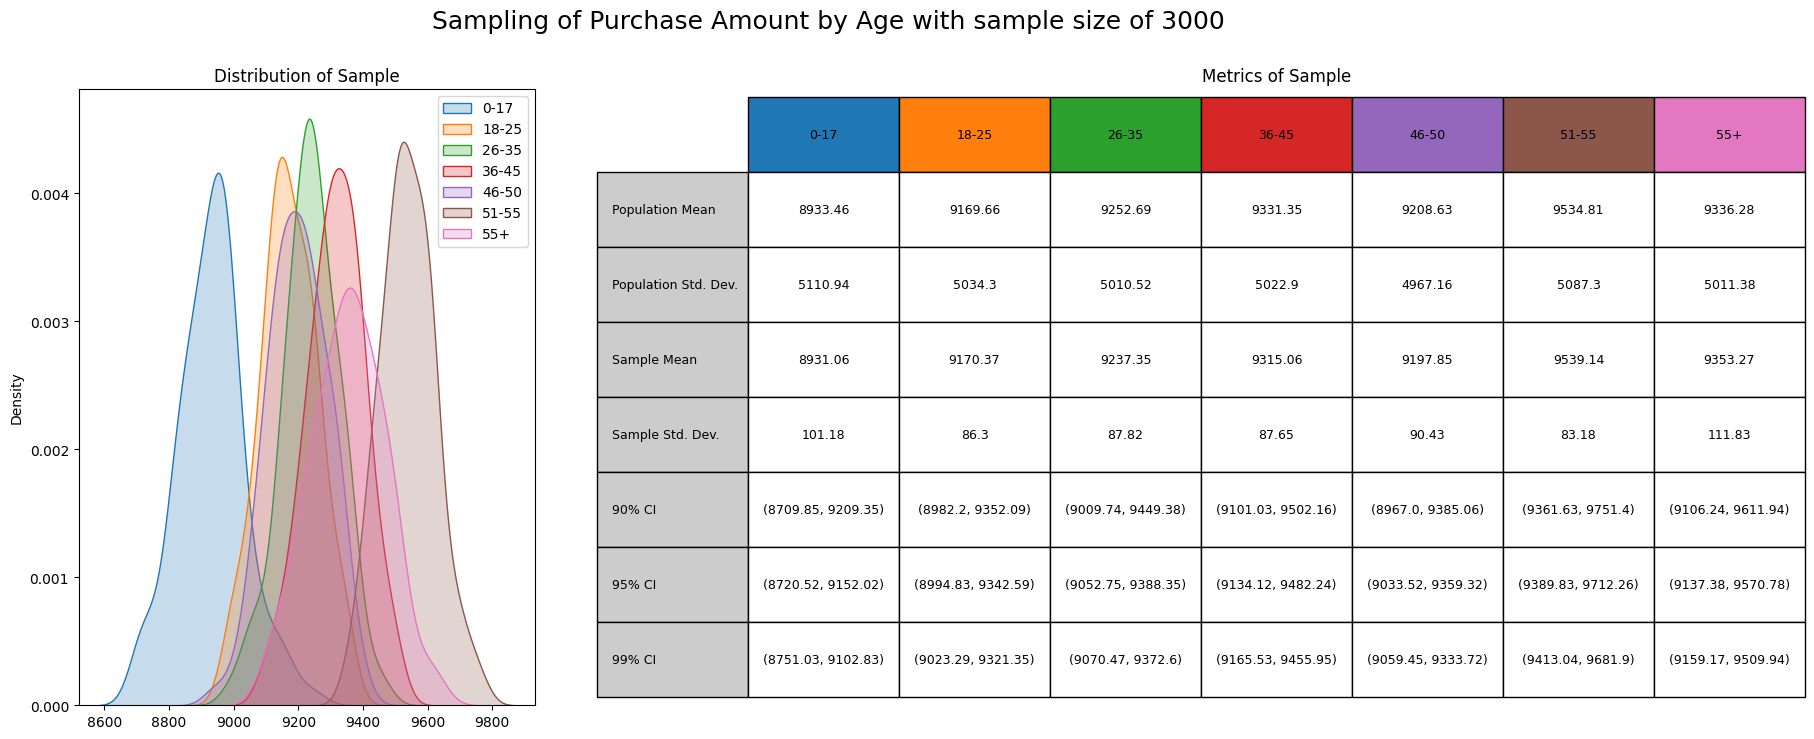

In [94]:
sampling_clt(parameter='Age', size=3000)

### CLT for Sample of size 30000

CLT for Purchase Amount with respect to Age
Sample Size: 30000


0-17
Population Mean: 8933.46
Population Standard Deviation: 5110.94
Sample Mean: 8938.54
Sample Standard Deviation: 28.77
90% Confidence Interval: (8888.28, 8977.35)
95% Confidence Interval: (8880.27, 8984.65)
99% Confidence Interval: (8867.33, 9002.6)


18-25
Population Mean: 9169.66
Population Standard Deviation: 5034.3
Sample Mean: 9167.67
Sample Standard Deviation: 28.77
90% Confidence Interval: (9126.14, 9212.66)
95% Confidence Interval: (9111.11, 9226.26)
99% Confidence Interval: (9079.28, 9236.56)


26-35
Population Mean: 9252.69
Population Standard Deviation: 5010.52
Sample Mean: 9250.97
Sample Standard Deviation: 29.08
90% Confidence Interval: (9208.08, 9293.91)
95% Confidence Interval: (9202.42, 9316.42)
99% Confidence Interval: (9187.29, 9326.32)


36-45
Population Mean: 9331.35
Population Standard Deviation: 5022.9
Sample Mean: 9327.94
Sample Standard Deviation: 26.31
90% Confidence Interval: (9272.8, 9365.11

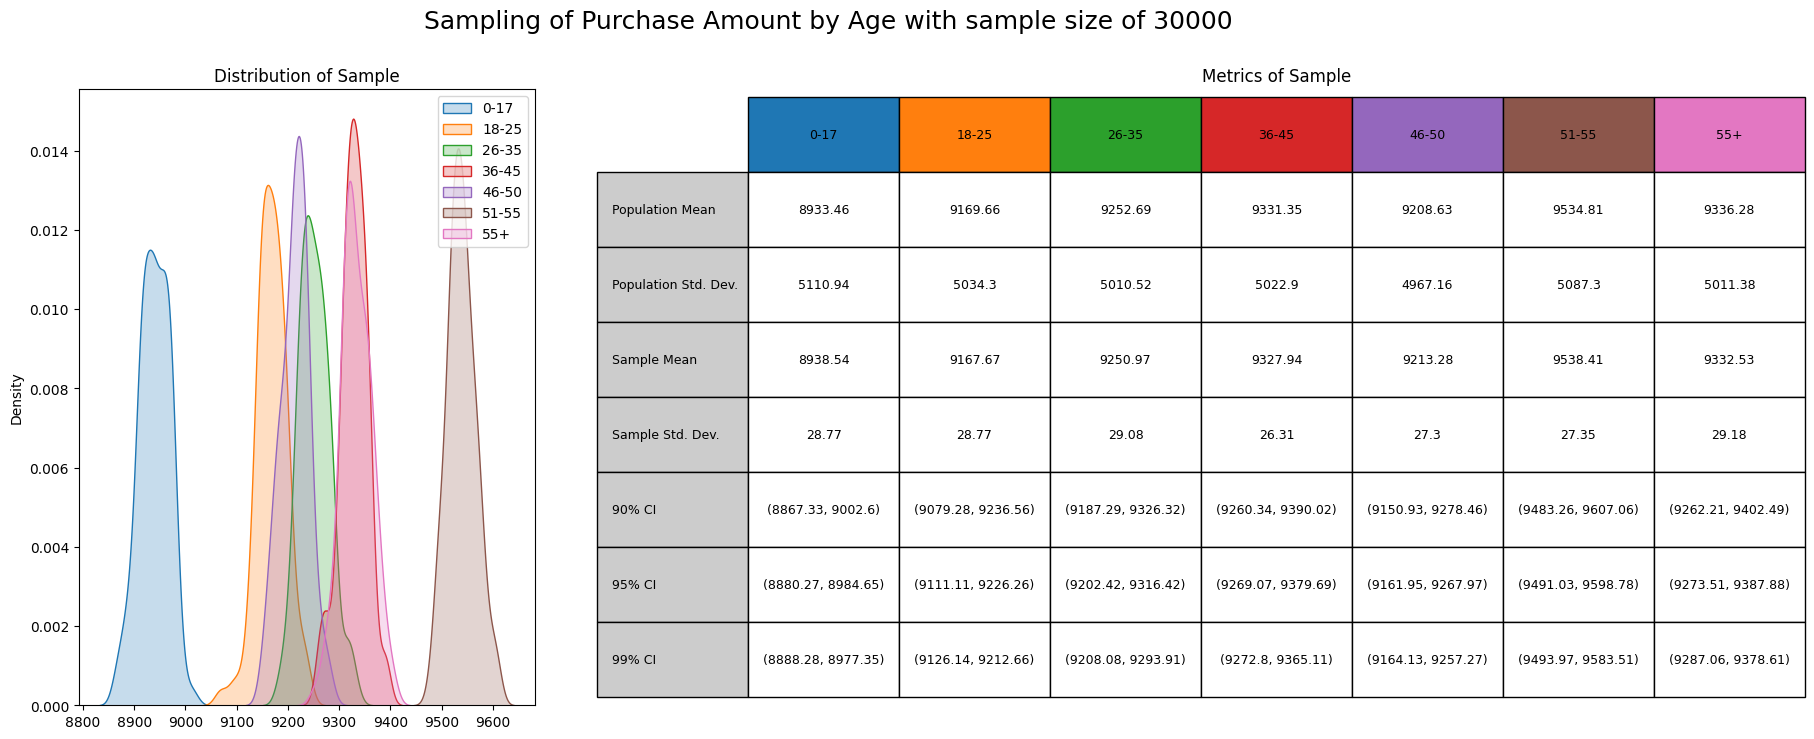

In [95]:
sampling_clt(parameter='Age', size=30000)

## Heat Map and Pair Plot

### Heat map

In [56]:
df_copy = df.copy()
df_copy['Gender'].replace({'Female' : 0, 'Male': 1}, inplace = True)
df_copy['Marital_Status'].replace({'Married' : 1, 'Unmarried': 0}, inplace = True)
df_copy['Age'].replace({'0-17':1, '18-25':2,'26-35':3, '36-45':4,'46-50':5,'51-55':6,'55+':7 }, inplace=True)
df_copy['City_Category'].replace({'A':1, 'B':2, 'C':3}, inplace=True)
df_copy['Stay_In_Current_City_Years'].replace({'0':0, '1':1, '2':2, '3':3, '4+': 4}, inplace = True)
corr_df = df_copy.corr(numeric_only=True).round(2)
corr_df

User_ID  Gender   Age  Occupation  City_Category  \
User_ID                        1.00   -0.03  0.03       -0.02           0.02   
Gender                        -0.03    1.00 -0.00        0.12          -0.00   
Age                            0.03   -0.00  1.00        0.09           0.12   
Occupation                    -0.02    0.12  0.09        1.00           0.03   
City_Category                  0.02   -0.00  0.12        0.03           1.00   
Stay_In_Current_City_Years    -0.03    0.01 -0.00        0.03           0.02   
Marital_Status                 0.02   -0.01  0.31        0.02           0.04   
Product_Category               0.00   -0.05  0.06       -0.01          -0.01   
Purchase                       0.00    0.06  0.02        0.02           0.06   

                            Stay_In_Current_City_Years  Marital_Status  \
User_ID                                          -0.03            0.02   
Gender                                            0.01           -0.01   
Age                                              -0.00            0.31   
Occupation                                        0.03            0.02   
City_Category                                     0.02            0.04   
Stay_In_Current_City_Years                        1.00           -0.01   
Marital_Status                                   -0.01            1.00   
Product_Category                                 -0.00            0.02   
Purchase                                          0.01           -0.00   

                            Product_Category  Purchase  
User_ID                                 0.00      0.00  
Gender                                 -0.05      0.06  
Age                                     0.06      0.02  
Occupation                             -0.01      0.02  
City_Category                          -0.01      0.06  
Stay_In_Current_City_Years             -0.00      0.01  
Marital_Status                          0.02     -0.00  
Product_Category                        1.00     -0.34  
Purchase                               -0.34      1.00

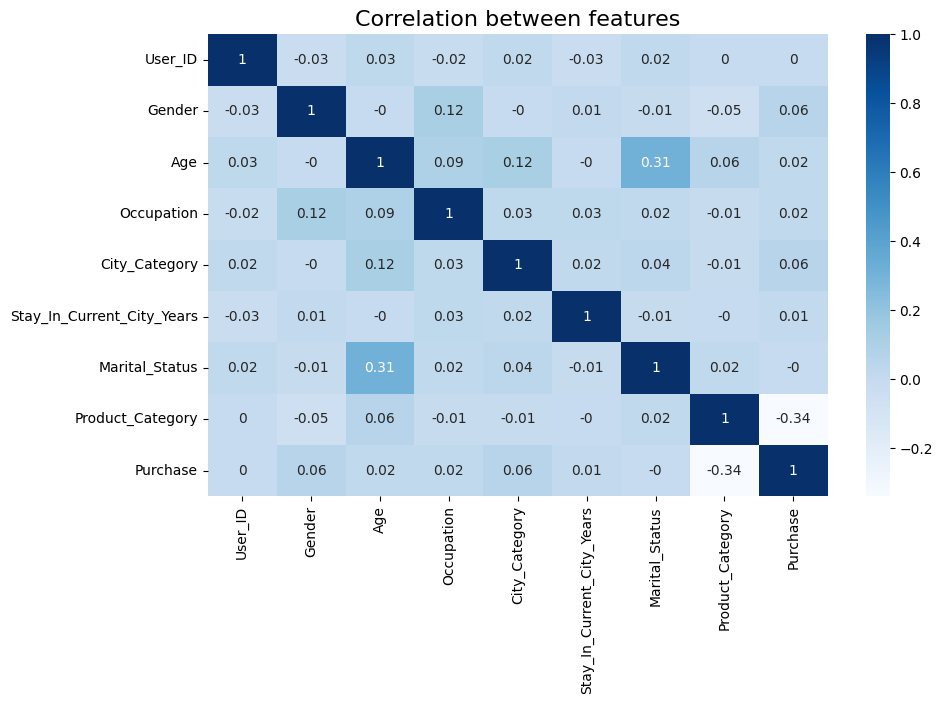

In [57]:
plt.figure(figsize = (10,6))
sns.heatmap(corr_df, cmap='Blues', annot = True)
plt.title('Correlation between features', fontsize = 16)
plt.show()

- We can see that there is no strong correlation of purchase with any feature.

- There’s a weak negative correlation between product category and purchase amount.

- Weak positive correlation between age and marital status.

### Pair Plot

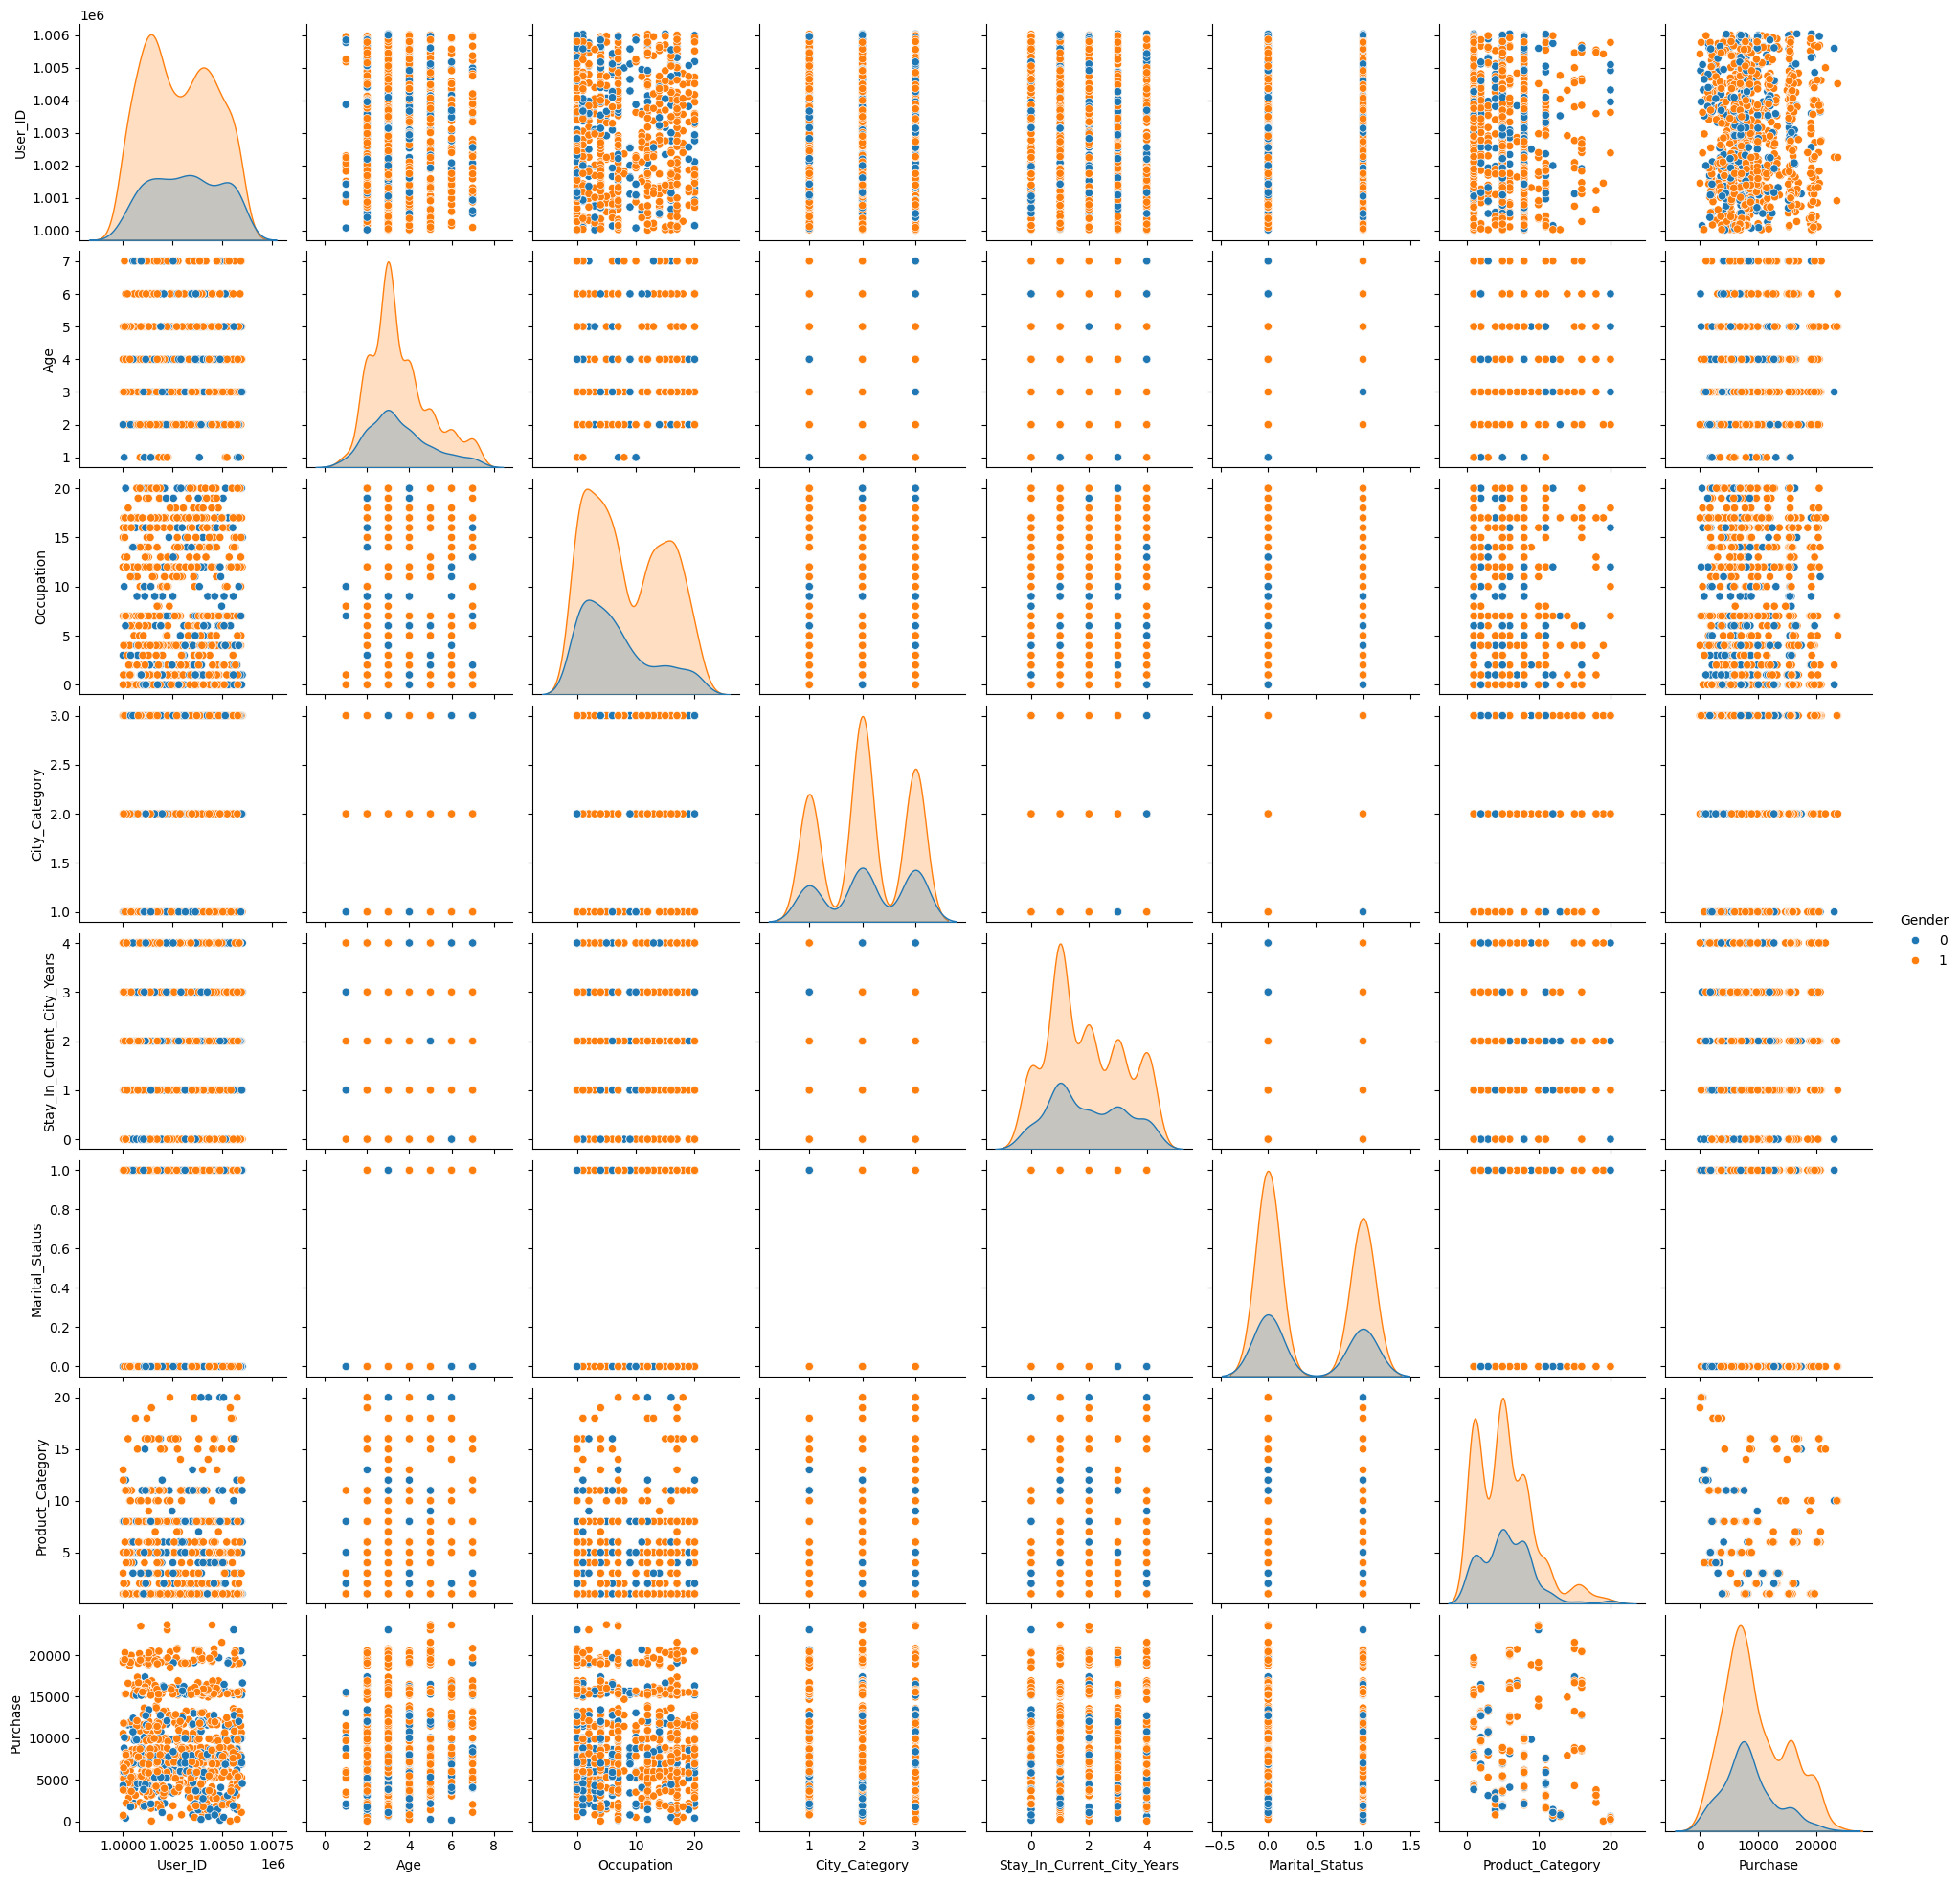

In [62]:
sns.pairplot(df_copy.sample(1000), hue='Gender')
plt.show()

In this pair plot, Blue color represents Female and Orange color represents Male

- Both males and females of city category B make more purchases compared to city categories A and C.

- Most of the purchases for both males and females lies between 0 - 10000.

- Females with occupation 0–10 made more purchases than females with occupations 11–20.

# Insights

- Male Customers made more purchases than Females i.e, 75% of the purchases were made by males and rest 25% by Females.

- Unmarried people made more purchases than married people i.e., 59% of the purchases were made by Unmarried and rest 41% by Married.

- People of city category B make more purchases than other city city categories. Around 42% of the purchases were made by people of city category B, 31% by people of city category C and 27% by people of city category A.

- People who have stayed in their city for only 1 year made more purchases than others whereas people who have stayed for less than a year or more than 4 years made least number of purchases.

- People in age group '26–35' made more purchases than any other age group.
whereas age group '0-17' made less purchases.

- Product categories 5, 1 and 8 sell more than other categories whereas Product categories 17 and 9 sell the least.

- People belonging to Occupations 0, 4 and 7 made more purchases than others whereas Occupation 8 people made less purchases.

- Products P00265242, P00025442, P00110742 were sold by most of the people whereas Products P00066342, P00204442, P00231642 etc. are some of the slow moving products.

- Purchase amounts between 5000 to 10000 are maximum in number.

- Average purchase amount of Males is 9437.53 USD whereas 8734.57 USD for Females.

- Average purchase amount of Unmarried is 9261.17 USD whereas 9265.91 USD for Married.

- People of Age group '51-55' make higher purchases with average purchase amount of 9534.81 USD. whereas '0-17' age group makes lower purchases with average purchase of 8933.46 USD

# Recommendations

**Inventory Management:**

- **Increase stock levels:** Prioritize stocking popular items (like P00265242, P00025442, P00110742) to ensure availability and prevent lost sales.

- **Reduce stock levels:** Gradually decrease stock levels for slow-moving items (like P00066342, P00204442) to avoid unnecessary storage costs and potential obsolescence.

**Marketing and Advertising:**

- **Targeted ads:**

  - Focus ad campaigns on young adults (26-35 years old) as they represent the highest spending demographic.

  - Consider incorporating new products that appeal specifically to this age group in your ad campaigns.

- **Location-based marketing:**

  - Target ads to people residing in city category B.

  - Focus on customers who have lived in their current city for 1-2 years as they might be more open to trying new products and services.

- **Customer segmentation:**

  - Develop targeted marketing campaigns for unmarried customers, as they represent a potentially lucrative segment.

**Product Placement:**

- Give prominent shelf space and visibility to products in categories 1, 5, and 8, as they are likely to be in higher demand.

**Promotional Strategies:**

- **Implement a tiered reward system:**

  - Offer discounts or other incentives for purchases exceeding a certain threshold, such as 12,000 USD.

  - Consider escalating the rewards as the purchase amount increases to further incentivize larger purchases.

- **Occupation-based Targeting:**

  - Stock more products that are popular with people in occupations 0, 4, and 7.

  - Target ads for slightly more expensive products to people in occupations 12 and 17, considering their higher median expense.

**Gender-based Targeting:**

- Target ads for products priced between 9,000 USD and 10,000 USD to males.

- Target ads for products priced between 8,500 USD and 9,200 USD to females.

**Age-based Targeting:**

- Target ads for products priced between 9,200 USD and 10,000 USD to customers aged 51-55.

- Target ads for products priced between 8,500 USD and 9,200 USD to customers aged 0-17.